<a href="https://colab.research.google.com/github/Motunrayo244/EDISS-MP/blob/main/MachineLearning/Hackathon/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of SimuSafe Dataset: an In-depth Analysis Using Clustering Technique


In 2010, the European union set out with the goal to achieve zero road accidents mortality by 2050 and have worked toward this goal by carrying out several research projects like the naturalistic Driving studies which was used to obtain the SimuSafe Dataset.

The SimuSafe project aims to understand the behaviour of road users and how the interaction between all various type of road users relate to safety on the road[3].


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from time import time

In [4]:
t_data = pd.read_excel("Feature_Track.xlsx")
sim_data = pd.read_excel("Feature_Simulation.xlsx")

In [5]:
print(f" The  track data has (row,columns{t_data.shape}")
print(f" The  simulation data has (row,columns{sim_data.shape}")


 The  track data has (row,columns(1056, 89)
 The  simulation data has (row,columns(1287, 89)


In [7]:
t_data['experiment'] = 'track'
sim_data['experiment'] = 'simulation'

In [8]:
full_dataset = pd.concat([t_data,sim_data], ignore_index=True)

In [9]:
full_dataset.describe()

Unnamed: 0          lap   start_time     straight  roundabout_entry  \
count  2343.000000  2343.000000  2343.000000  2343.000000       2343.000000   
mean    590.943662     3.962441    78.379428     0.726846          0.199744   
std     347.932434     1.993017    48.832744     1.367736          0.399893   
min       0.000000     1.000000     0.000000     0.000000          0.000000   
25%     292.500000     2.000000    36.000000     0.000000          0.000000   
50%     585.000000     4.000000    77.000000     0.000000          0.000000   
75%     878.000000     6.000000   113.000000     1.000000          0.000000   
max    1286.000000     7.000000   400.000000     7.000000          1.000000   

       roundabout_exit  zebra_crossing   left_turn       u_turn  bypass_dummy  \
count      2343.000000     2343.000000  2343.00000  2343.000000   2343.000000   
mean          0.181818        0.509603     0.21767     0.078105      0.022621   
std           0.385777        0.500014     0.41275     0.268394      0.148722   
min           0.000000        0.000000     0.00000     0.000000      0.000000   
25%           0.000000        0.000000     0.00000     0.000000      0.000000   
50%           0.000000        1.000000     0.00000     0.000000      0.000000   
75%           0.000000        1.000000     0.00000     0.000000      0.000000   
max           1.000000        1.000000     1.00000     1.000000      1.000000   

       ...  LowerAlphaFrontal  LowerAlphaParietal  UpperAlphaFrontal  \
count  ...        1904.000000         1904.000000        1904.000000   
mean   ...           0.129809            0.131904           0.097420   
std    ...           0.125394            0.145928           0.080345   
min    ...           0.022300            0.021950           0.014190   
25%    ...           0.061607            0.064513           0.049375   
50%    ...           0.089455            0.095460           0.075200   
75%    ...           0.145765            0.138582           0.115452   
max    ...           1.022650            1.960860           1.295650   

       UpperAlphaParietal  BetaFrontal  BetaParietal  LowerBetaFrontal  \
count         1904.000000  1904.000000   1904.000000       1904.000000   
mean             0.111945     0.047111      0.046468          0.062627   
std              0.097630     0.041654      0.039691          0.048466   
min              0.015970     0.006700      0.008720          0.008800   
25%              0.056118     0.023465      0.024207          0.034090   
50%              0.088190     0.034455      0.036920          0.049810   
75%              0.123117     0.054835      0.051085          0.071715   
max              1.297160     0.460890      0.433110          0.545820   

       LowerBetaParietal  UpperBetaFrontal  UpperBetaParietal  
count        1904.000000       1904.000000        1904.000000  
mean            0.068696          0.037718           0.032796  
std             0.054796          0.038883           0.032510  
min             0.013510          0.004320           0.005890  
25%             0.037237          0.016557           0.015675  
50%             0.057205          0.025225           0.023705  
75%             0.075173          0.044148           0.037455  
max             0.725710          0.480500           0.459800  

[8 rows x 88 columns]

In [10]:
t_data.drop(['Unnamed: 0'], axis=1, inplace=True)
sim_data.drop(['Unnamed: 0'], axis=1, inplace = True)
full_dataset.drop(['Unnamed: 0'], axis=1, inplace = True)

## EDA

In [11]:
sim_subject = set(sim_data['subject'].unique())
print(sim_subject)

{'8924EA', 'D4F190', 'EAC86C', 'DCF930', '144282', 'F9D528', '9A13EF', 'C1CE6B', '492488', '92710E', 'B570F8', '13790E', 'ED731A', '0AC2A4', 'EDEB96', '45792B', '6B11F5', 'B410A4', '2268A5'}


In [13]:
t_subject = set(t_data['subject'].unique())
print(t_subject)

{'144282', 'ED731A', '0AC2A4', 'F9D528', 'D4F190', '8924EA', 'EDEB96', '92710E', 'C1CE6B', '492488', '6B11F5', 'B570F8', '13790E', 'B410A4', 'DCF930', '2268A5'}


In [14]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 89 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   subject                        2343 non-null   object 
 1   lap                            2343 non-null   int64  
 2   start_time                     2343 non-null   int64  
 3   straight                       2343 non-null   int64  
 4   roundabout_entry               2343 non-null   int64  
 5   roundabout_exit                2343 non-null   int64  
 6   zebra_crossing                 2343 non-null   int64  
 7   left_turn                      2343 non-null   int64  
 8   u_turn                         2343 non-null   int64  
 9   bypass_dummy                   2343 non-null   int64  
 10  car                            2343 non-null   int64  
 11  pedestrian                     2343 non-null   int64  
 12  traffic_light                  2343 non-null   i

In [15]:
binary_numeric_cols = [col for col in t_data.columns if np.all(t_data[col].isin([0, 1]))]
boolean_cols = [col for col in t_data.select_dtypes(include=['bool']).columns.tolist()]

# Combine lists (if needed) or just use one of them based on your criteria
binary_features = list(set(binary_numeric_cols + boolean_cols))


In [16]:
categorical_field =['habituation', 'traffic', 'hurry', 'frustration', 'surprise', 'risk_outcome','risk_evaluation','lap']

In [17]:
t_data[binary_features] = t_data[binary_features].astype('bool')
sim_data[binary_features] = sim_data[binary_features].astype('bool')
t_data[categorical_field]= t_data[categorical_field].astype('category')
sim_data[categorical_field] = sim_data[categorical_field].astype('category')

full_dataset[binary_features] = full_dataset[binary_features].astype('bool')
full_dataset[categorical_field]= full_dataset[categorical_field].astype('category')


## Exploratory Data Analysis

In the EDA carried, we tried to find the relationship between the features in the dataset. We also compared the values of the features in the simulated experiment to the track experiment. From this analysis we observed the following:
1.	 Most records in the simulated experiment have a higher tendency to have a risk outcome of 1 (no risk).

2.	The range of values for vert_acce is higher in the track dataset than in the simulated experiments.  
3.	The roll rate varies more in the simulated experiments than in the track experiments. Also, most data point in the track experiments have a roll rate of 0, while the centre of the experiment distribution peaks at 2.0 for same feature.
4.	The peak values of the steer_angle and pitch rate  is higher in the simulation dataset than in the track dataset.


In [18]:
numeric_features = full_dataset.select_dtypes(include=np.number).columns.tolist()
object_features = full_dataset.select_dtypes(include='object').columns.tolist()

categorical_features = full_dataset.select_dtypes(include='category').columns.tolist()

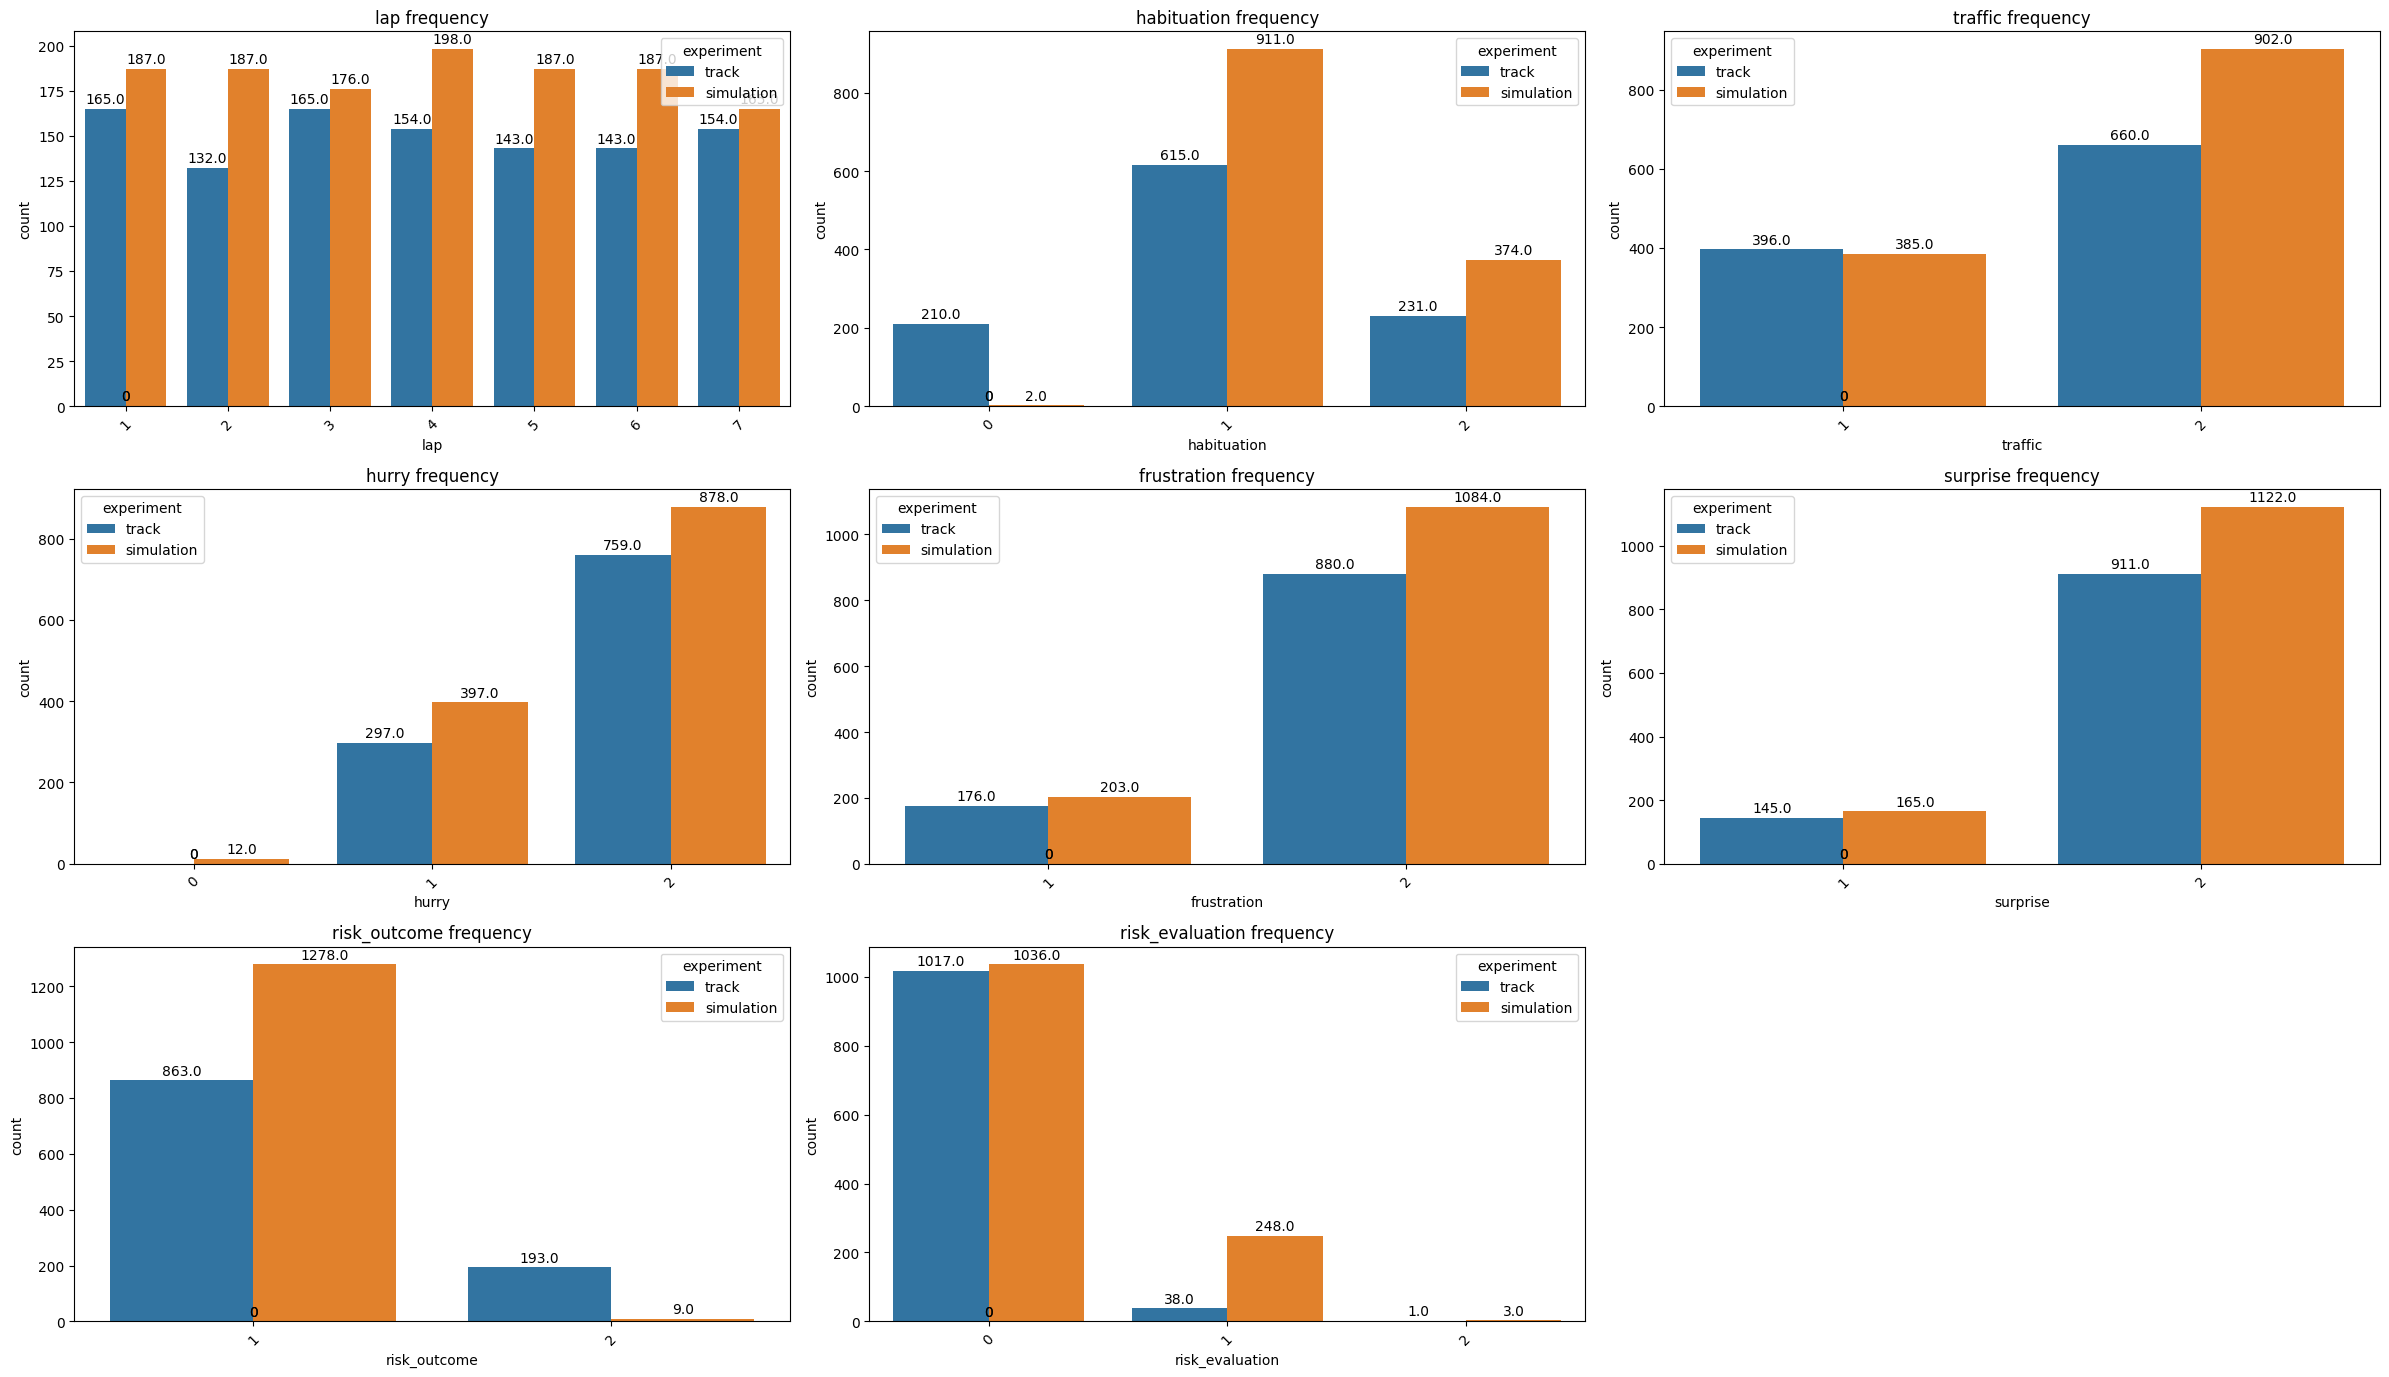

In [19]:
# Number of rows and columns for the subplot grid
n_rows = 4
n_cols = 3

custom_colors = {'simulation': 'orange', 'track': 'green'}
# Create a figure with subplots
plt.figure(figsize=(24, 18))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(data=full_dataset, x=column, hue='experiment')
    plt.title(f'{column} frequency')
    plt.xticks(rotation=45)

    # Adding the text on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 7),
                    textcoords = 'offset points')

    plt.tight_layout()

# Display the figure
plt.show()

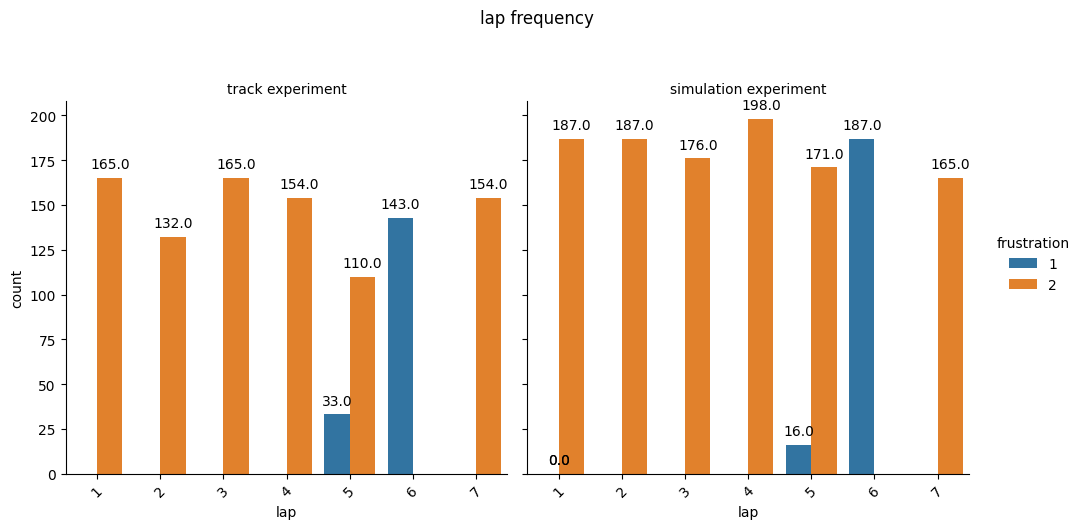

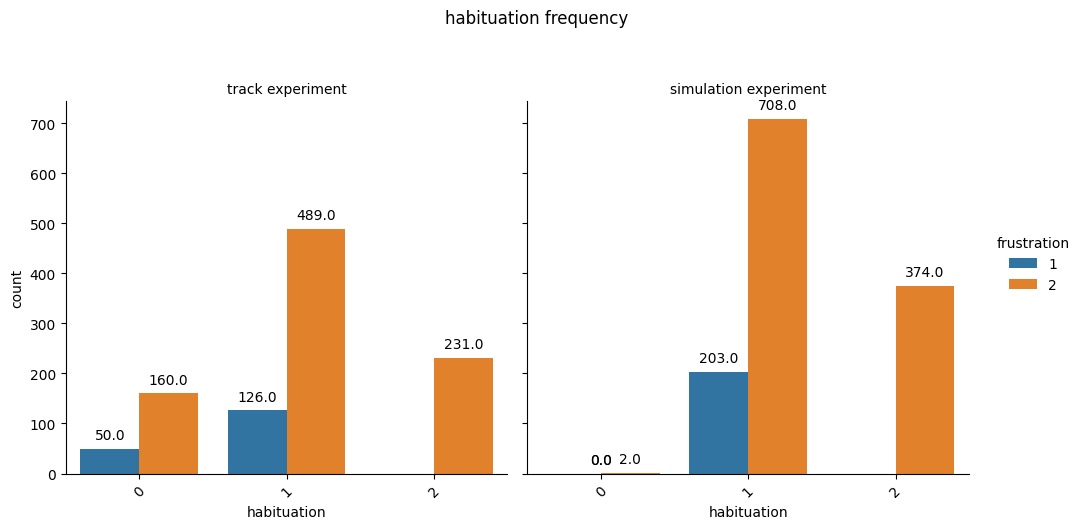

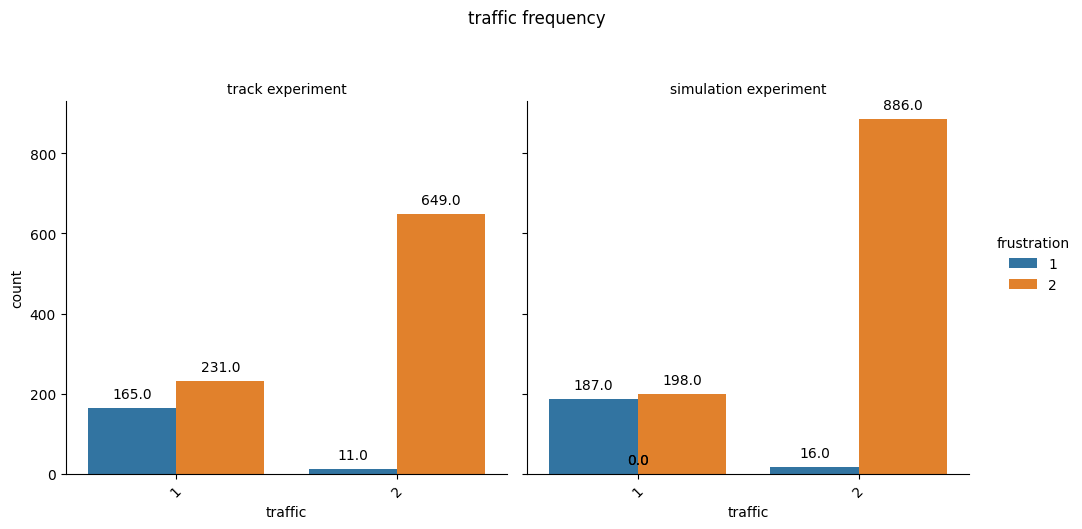

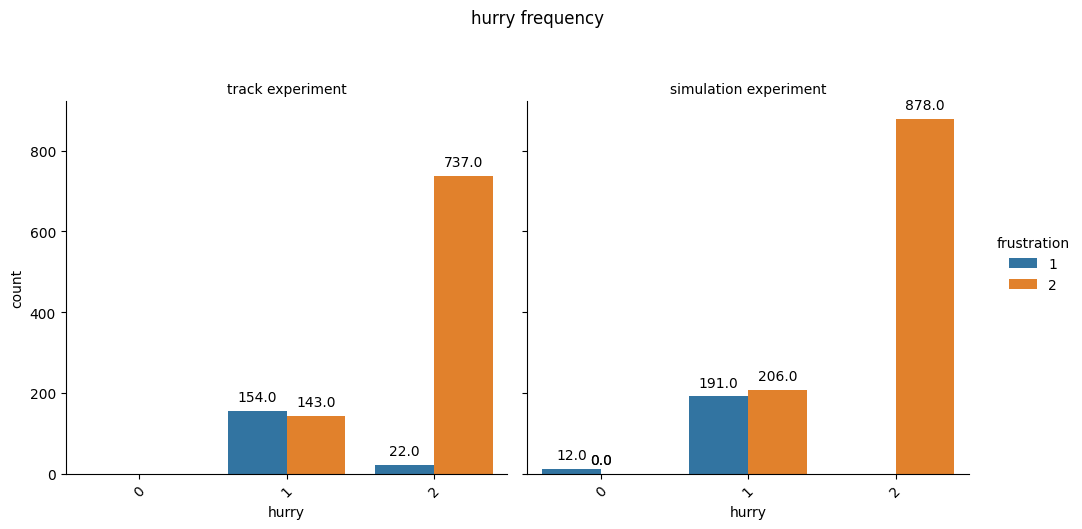

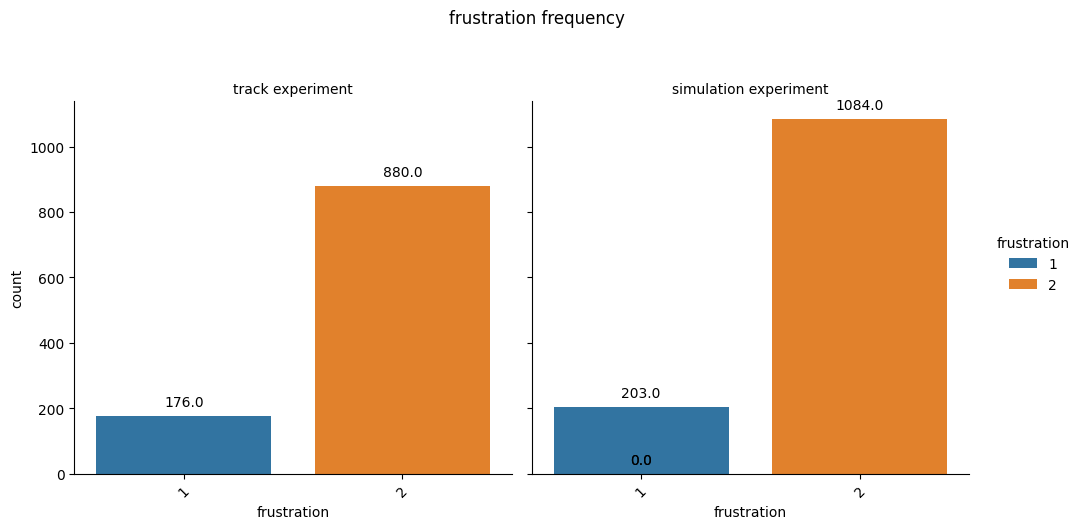

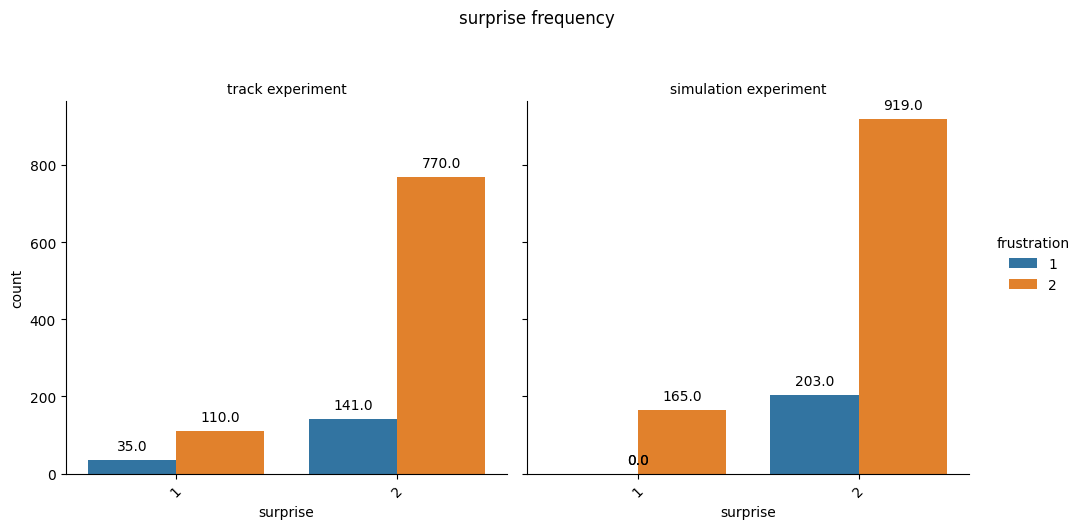

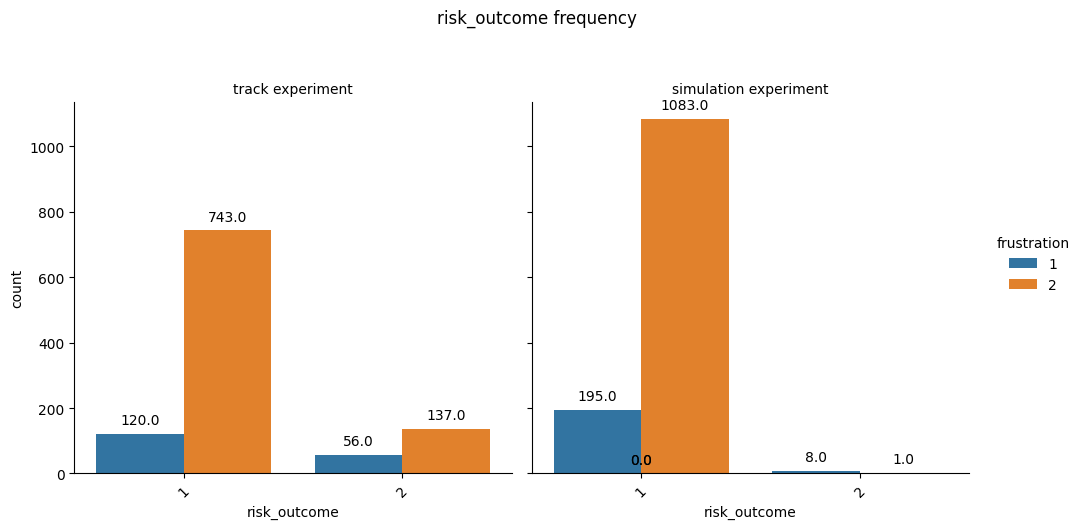

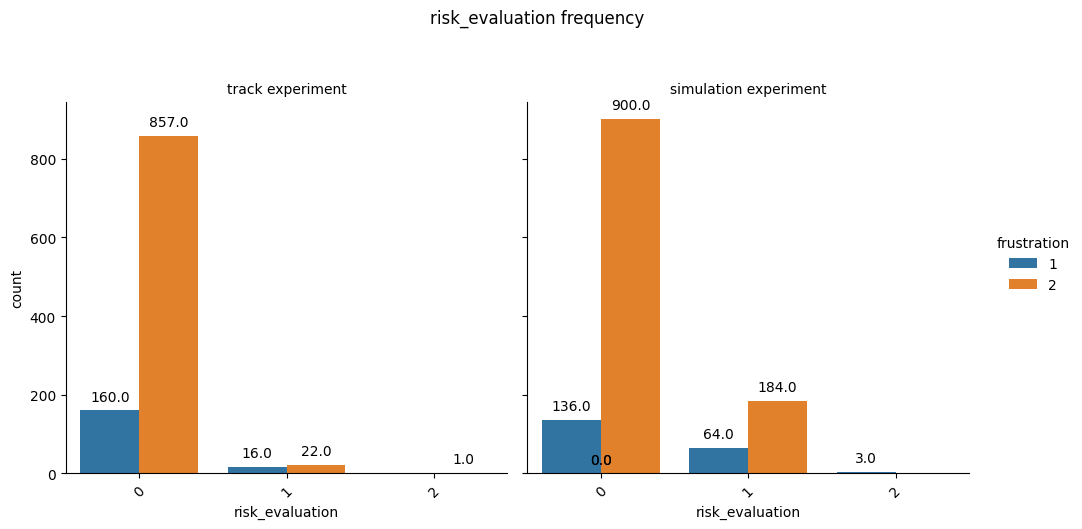

In [ ]:
for column in categorical_features:
    # Create catplot
    g = sns.catplot(data=full_dataset, x=column, hue='frustration', col='experiment',
                    kind='count', height=5, aspect=1)

    # Set titles and adjust layout
    g.fig.suptitle(f'{column} frequency', y=1.05)
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.tight_layout()

    # Iterate over each subplot / Axes in the catplot and annotate bars
    for ax in g.axes.flatten():
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.1f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

    plt.show() # Show each catplot separately

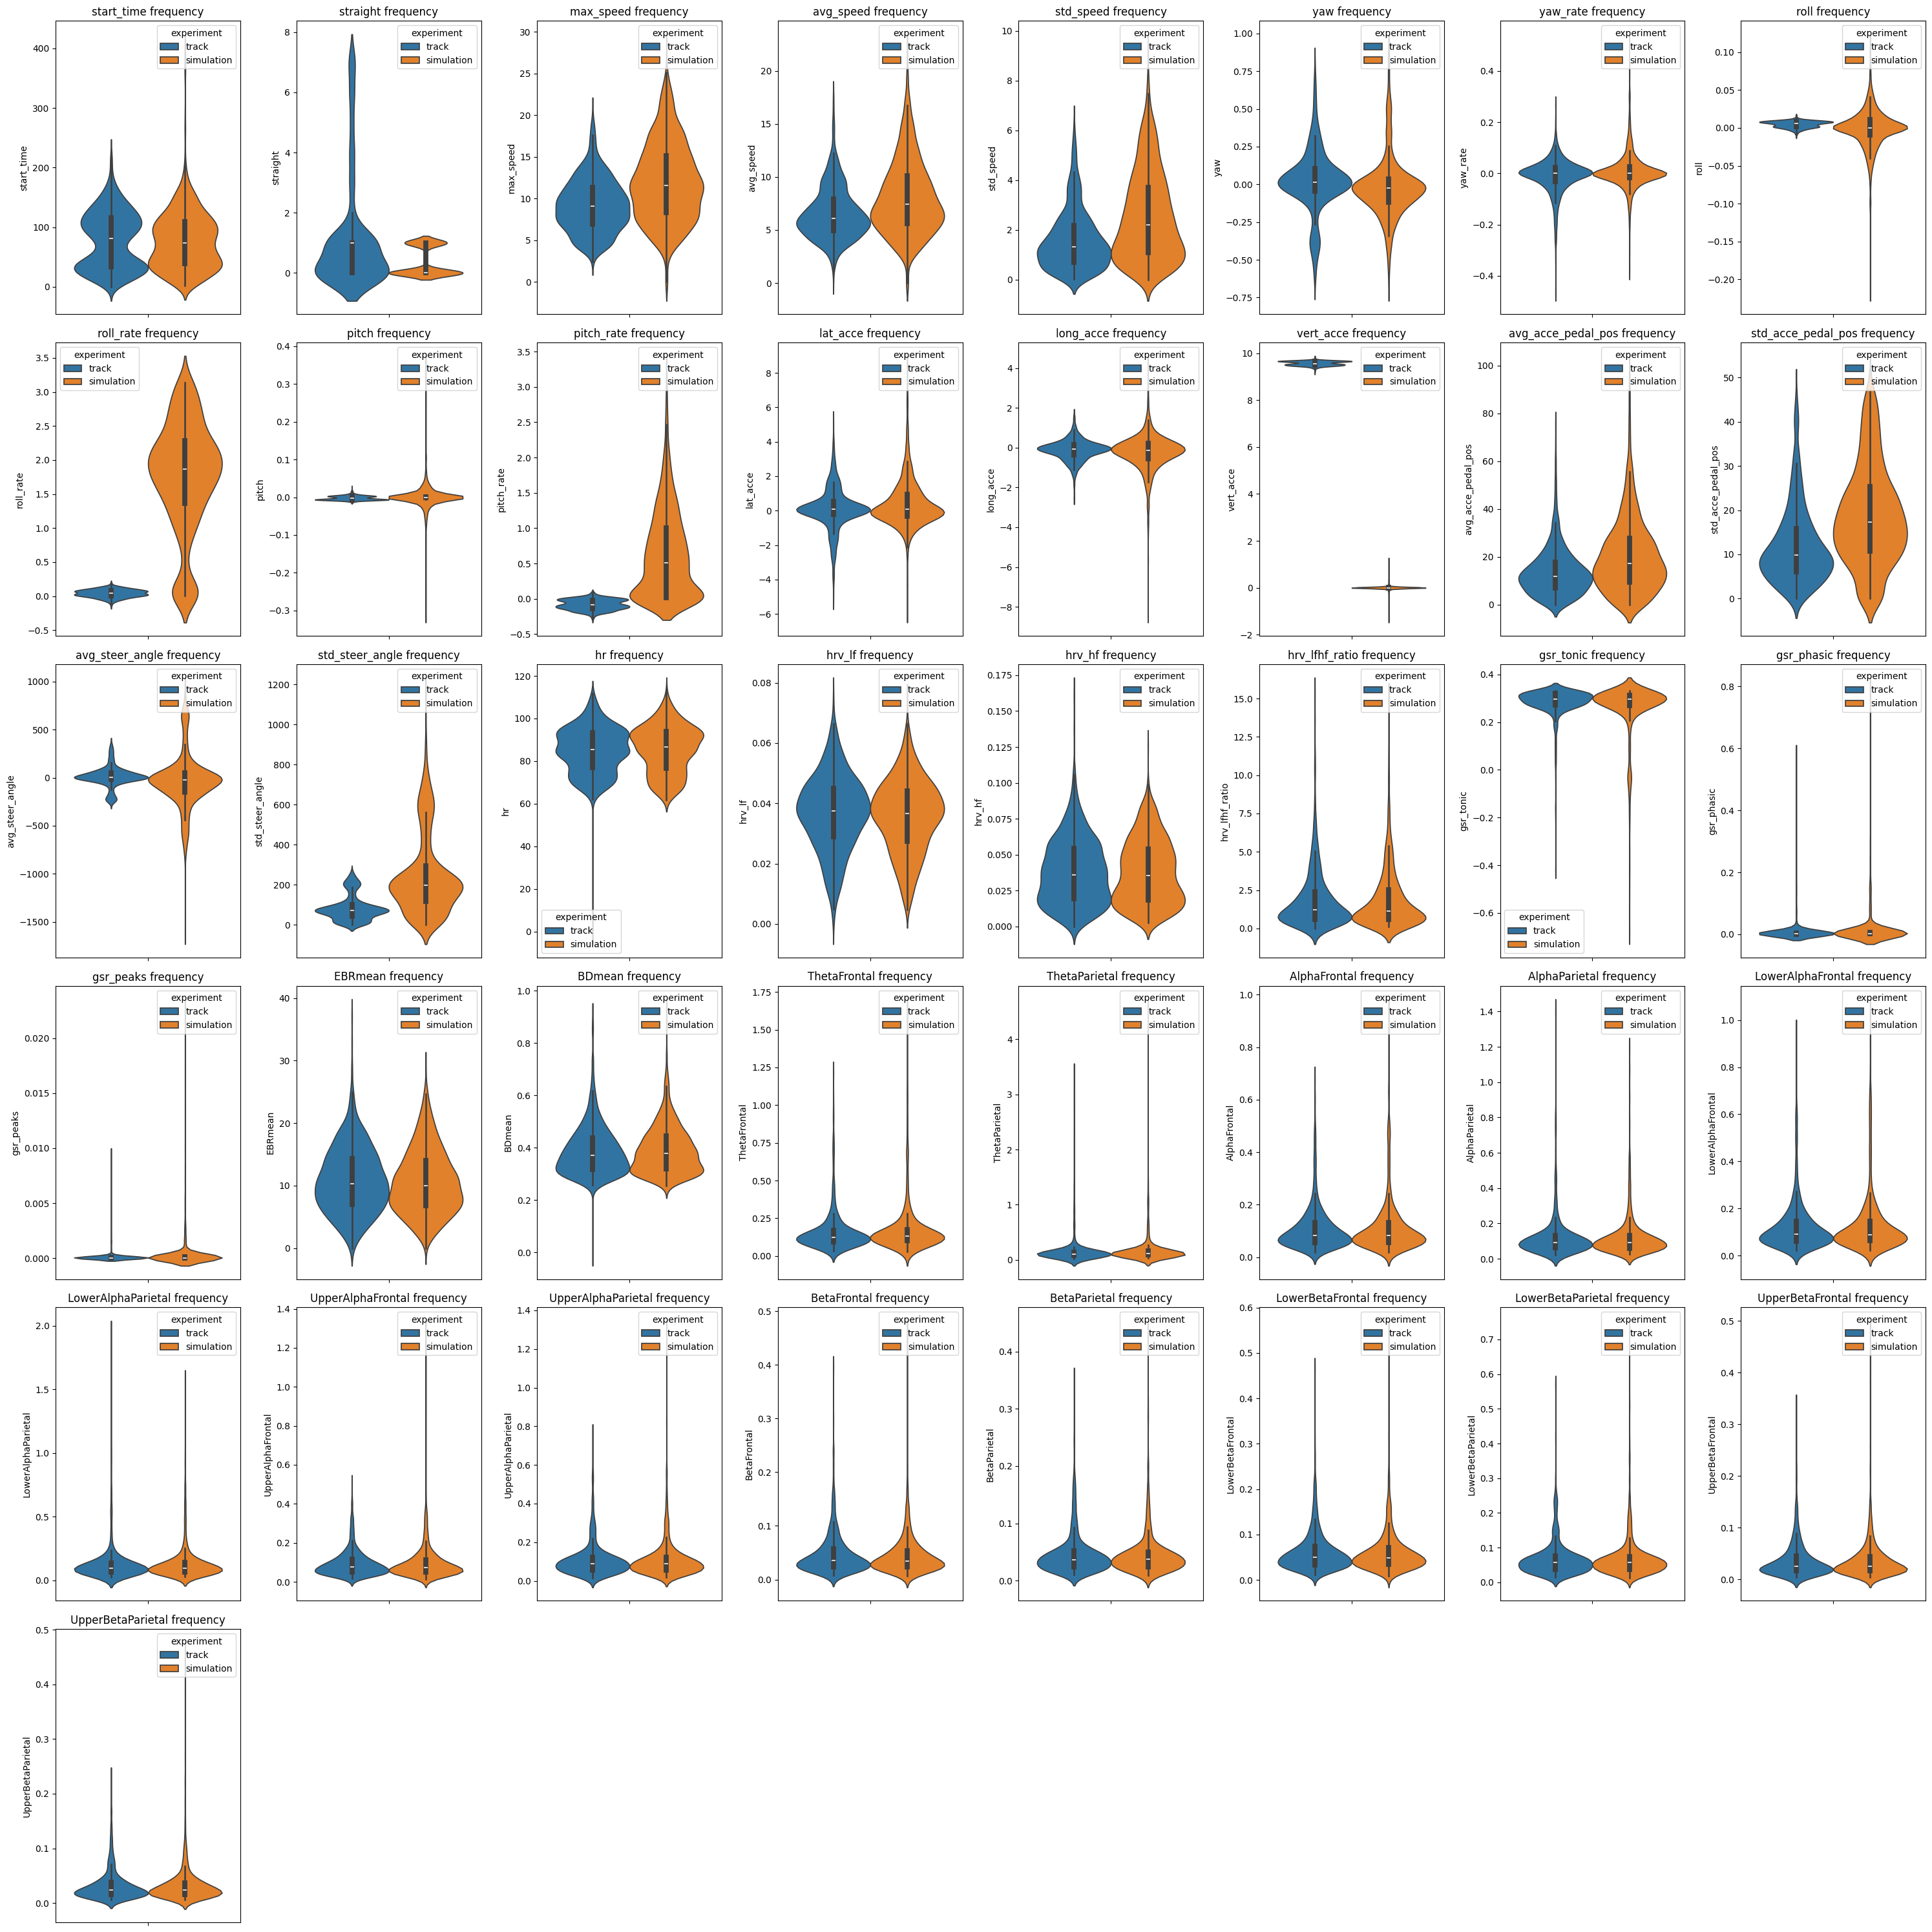

In [ ]:
# Number of rows and columns for the subplot grid
n_rows = 6
n_cols = 8

custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(30, 30))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=full_dataset, y=column, hue='experiment')
    plt.title(f'{column} frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()


In [ ]:
cat_interest = ['avg_acce_pedal_pos', 'std_acce_pedal_pos', 'pitch_rate','std_steer_angle','roll_rate']


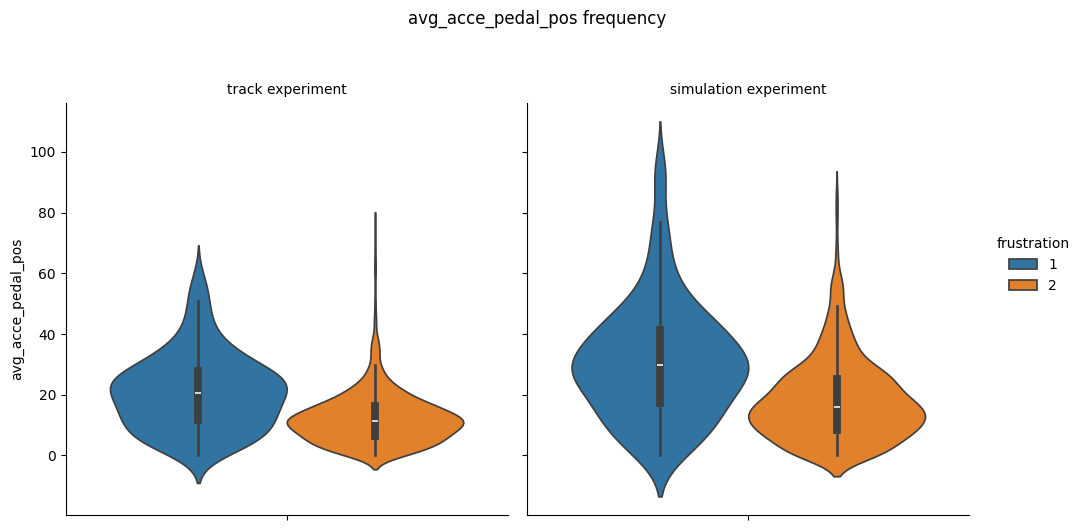

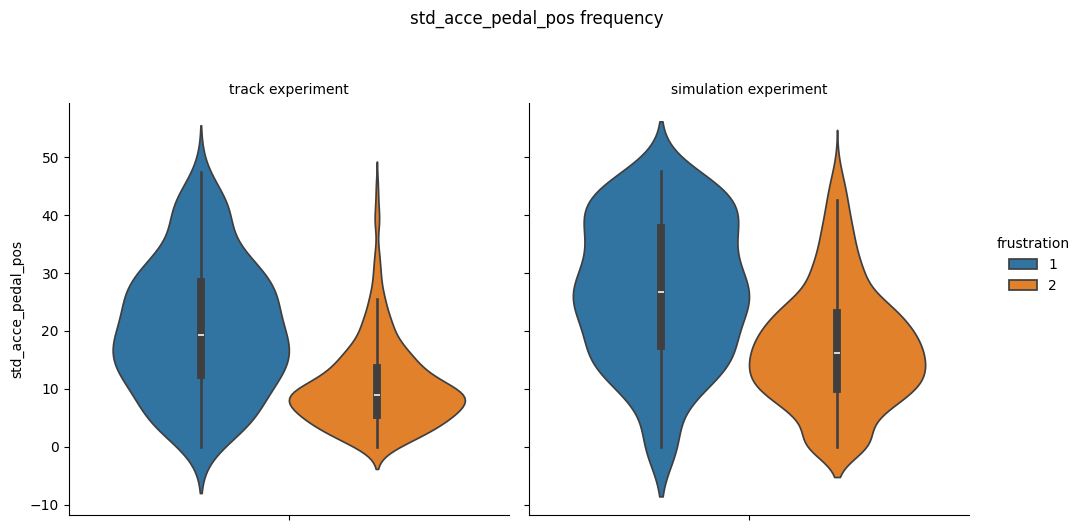

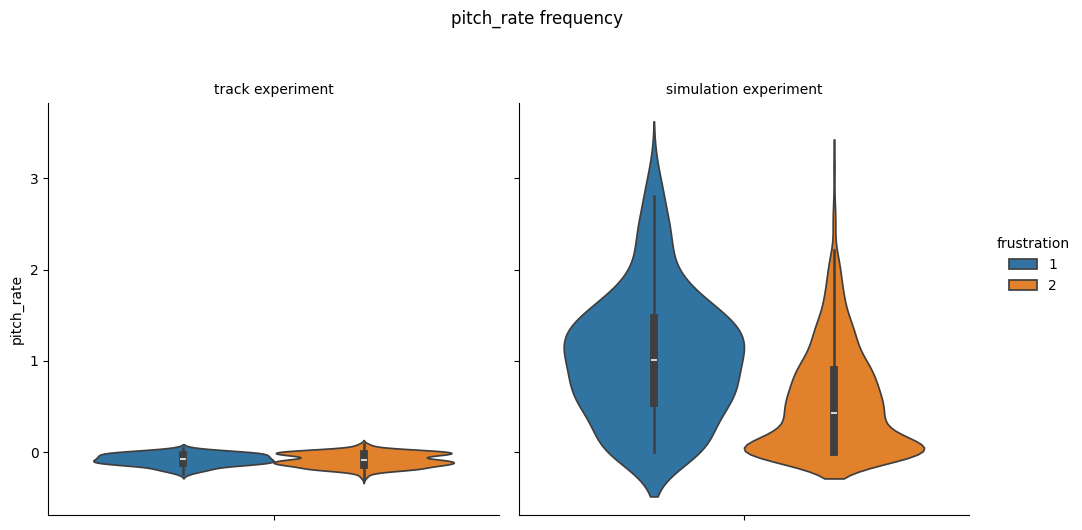

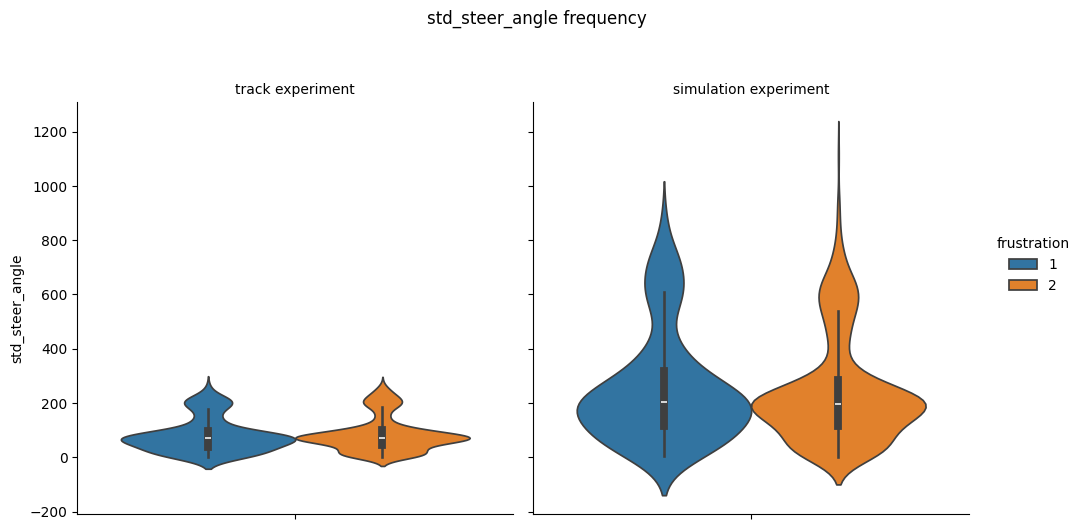

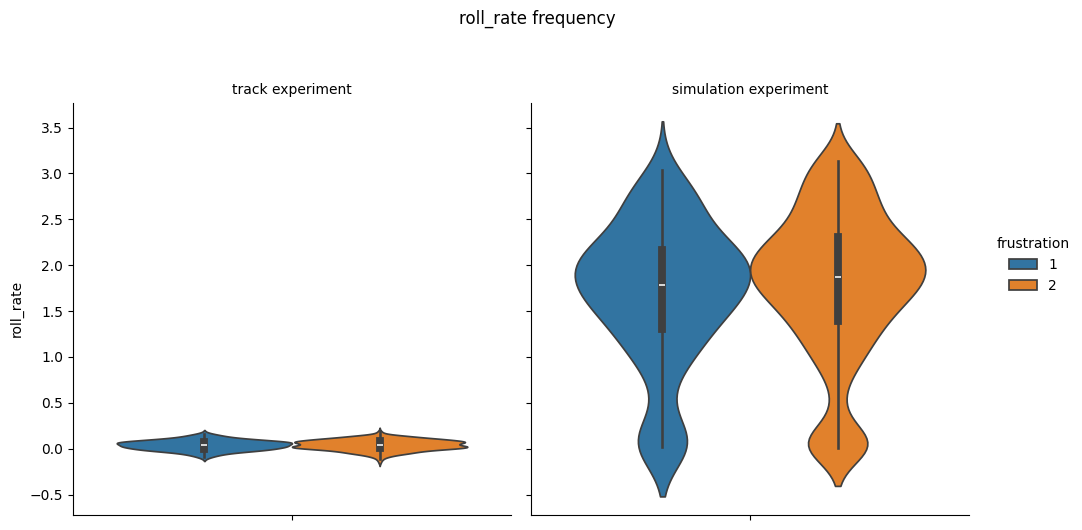

In [ ]:
for column in cat_interest:
    # Create catplot
    g = sns.catplot(data=full_dataset, y=column, hue='frustration', col='experiment',
                    kind='violin', height=5, aspect=1)

    # Set titles and adjust layout
    g.fig.suptitle(f'{column} frequency', y=1.05)
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.tight_layout()


    plt.show() # Show each catplot separately

In [ ]:
heat_map_col = numeric_features + categorical_features

<ipython-input-51-b2796a18b1ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(t_data[heat_map_col].corr().corr(), dtype=bool))
<ipython-input-51-b2796a18b1ca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(t_data[heat_map_col].corr(),


Text(0.5, 1.0, 'Heatmap of DataFrame')

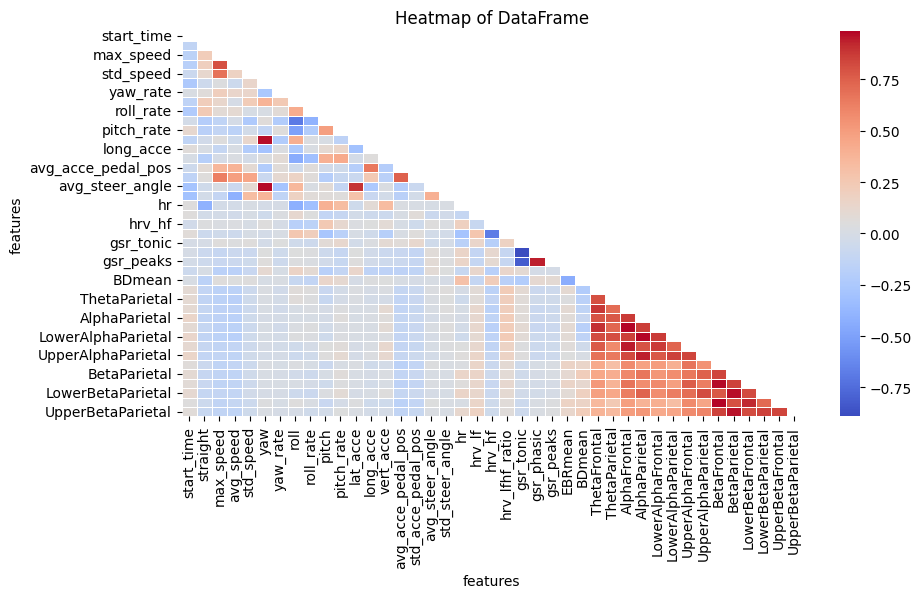

In [ ]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(t_data[heat_map_col].corr().corr(), dtype=bool))
sns.heatmap(t_data[heat_map_col].corr(),
            annot=False, cmap='coolwarm', linewidths=0.5,  mask=mask)
plt.xlabel("features")
plt.ylabel("features")
plt.title("Heatmap of DataFrame")

## Clustering Analysis
The clustering analysis technique used was the KMeans algorithm. We utilized the elbow method and result of the silhouette score to determine the best clusters. The elbow method involves the comparison of the cost function for preselected range of clusters. At some hyperparameter value, the cost decreases exponentially after which an addition to the value of the parameter will result in a minute reduction in the cost.

In [88]:
full_dataset['straight'] = full_dataset['straight'].apply(lambda x: x if x ==1 else 0)
full_dataset= full_dataset[full_dataset['hurry']!= 0]

In [174]:
full_dataset.shape

(2331, 89)

In [ ]:
features_2 = [
    'max_speed', 'avg_speed', 'std_speed', 'yaw_rate', 'roll_rate',
    'lat_acce', 'long_acce', 'vert_acce', 'avg_steer_angle', 'std_steer_angle',
    'hr', 'hrv_lf', 'hrv_hf', 'gsr_tonic', 'gsr_phasic',
    'frustration', 'surprise', 'risk_outcome', 'emotion_na',
    'emotion_neutral', 'emotion_surprise', 'emotion_anger',
    'emotion_boredom', 'emotion_fear', 'emotion_fun','gaze_na', 'gaze_complete_expl',
    'gaze_partial_expl', 'gaze_poor_expl','distraction_na', 'distraction_no',
    'distraction_reduced_attention',  'distraction_speaking', 'std_acce_pedal_pos'
]

In [89]:
X = full_dataset.drop(['subject','lap','start_time'], axis= 1)
X.dropna(axis=0,inplace=True)
data = X.drop(['experiment'], axis=1)
# data = X[features_2]

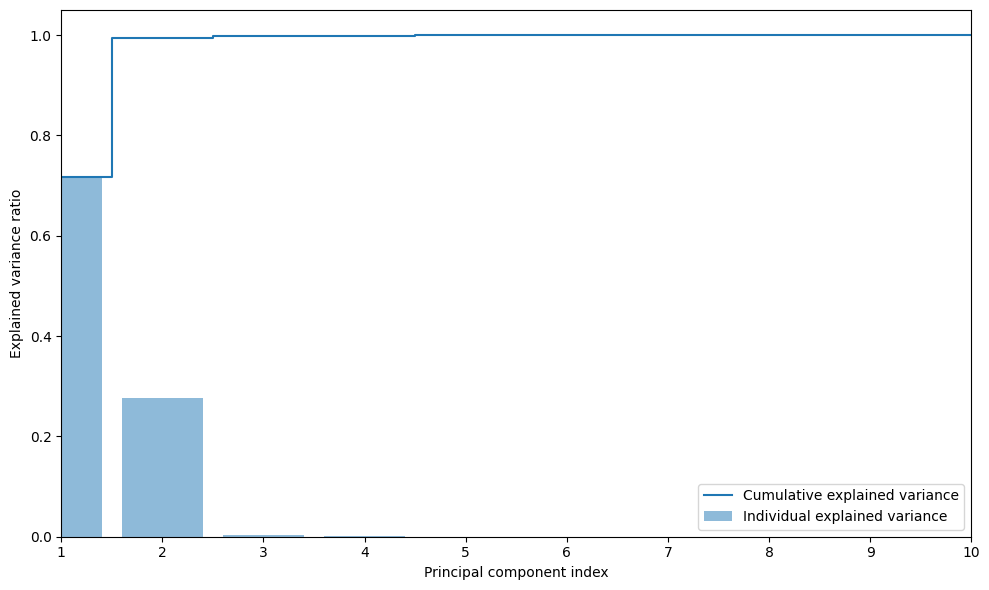

Optimal number of PCA components based on elbow method: 2


In [90]:
# Compute PCA without reducing dimensionality to get full variance explanation
pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_

# Limit the number of components for the scree plot to the first 100
n_components_to_display = 10
explained_variance_limited = explained_variance[:n_components_to_display]

# Generate Scree plot for the first 10 components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_limited) + 1), explained_variance_limited, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_limited) + 1), np.cumsum(explained_variance_limited), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.xlim(1, n_components_to_display)  # Set the x-axis limits to show only the first 100 components
plt.tight_layout()
plt.show()

# Determine the elbow point, which is where the variance starts to level off
# This is subjective but typically you look for a 'knee' in the scree plot
# One method is to look for the point where the second derivative (the change in the change of variance explained) is greatest
second_derivative = np.diff(np.cumsum(explained_variance), 2)
elbow_point = np.argmin(second_derivative) + 2  # +2 because the second derivative reduces the length by 2
print(f"Optimal number of PCA components based on elbow method: {elbow_point}")

In [91]:

pca_cols = [f'PC{i}' for i in range(1,3)]

pca = PCA(n_components=2)  # Use 2 for 2D visualization, 3 for 3D
principal_components = pca.fit_transform(data)

# Create a DataFrame with the principal components
df_pca_2 = pd.DataFrame(data=principal_components, columns=pca_cols)

In [93]:
components = pca.components_
components_df = pd.DataFrame(components, columns=data.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])


In [94]:
components = pca.components_
components_df = pd.DataFrame(components, columns=data.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

top_contributors = {}
for i, pc in enumerate(components_df.index):
    # Getting the absolute values of loadings to consider contribution magnitude
    loadings = components_df.loc[pc].abs()
    # Sorting the features based on their contribution magnitude
    sorted_loadings = loadings.sort_values(ascending=False)
    # Taking the top N features, e.g., top 3 contributors
    top_contributors[pc] = sorted_loadings[:10].index.tolist()

# Displaying the top contributing features for each principal component
set_contributors = set()
for pc in list(top_contributors.keys()):
  print(f"Top contributor for {pc} are: {top_contributors[pc]}\n")
  set_contributors.update(top_contributors[pc])

print (f"\nThere are {len(set_contributors)} unique \n \nContributors are: {set_contributors}")

Top contributor for PC1 are: ['avg_steer_angle', 'std_steer_angle', 'std_acce_pedal_pos', 'vert_acce', 'roll_rate', 'lat_acce', 'max_speed', 'avg_acce_pedal_pos', 'std_speed', 'avg_speed']

Top contributor for PC2 are: ['std_steer_angle', 'avg_steer_angle', 'vert_acce', 'std_acce_pedal_pos', 'hr', 'lat_acce', 'std_speed', 'avg_speed', 'max_speed', 'avg_acce_pedal_pos']


There are 11 unique 
 
Contributors are: {'vert_acce', 'lat_acce', 'std_speed', 'avg_speed', 'std_acce_pedal_pos', 'std_steer_angle', 'hr', 'roll_rate', 'avg_steer_angle', 'max_speed', 'avg_acce_pedal_pos'}


In [95]:

wcss = []
silhouette_scores = []
start = time()
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init ='auto', max_iter=1000, random_state=42)
  kmeans.fit(df_pca_2)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(df_pca_2, kmeans.labels_)

  else:
       score = None
  silhouette_scores.append(score)


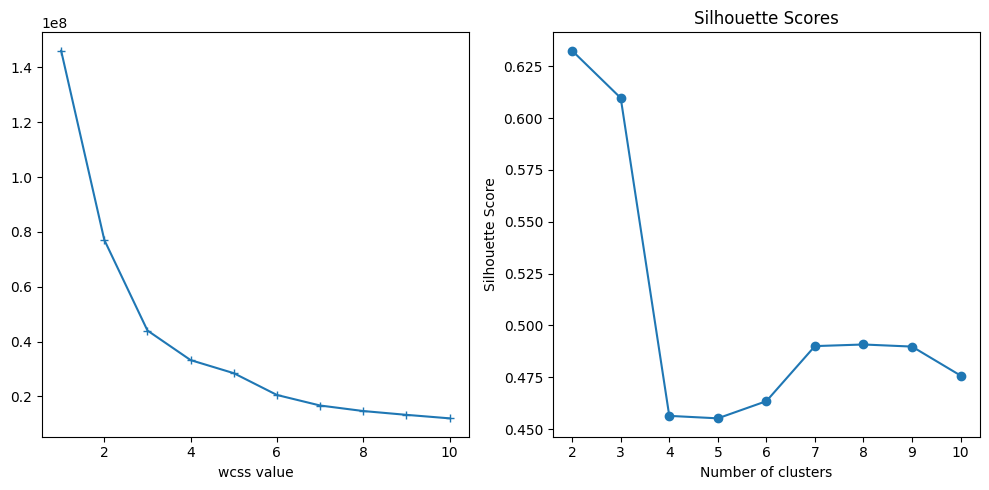

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,11),wcss, marker='+')
plt.xlabel('No of clusters')
plt.xlabel('wcss value')

# Plotting the silhouette scores on the second subplot
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [115]:
kmeans = KMeans(n_clusters=3, n_init='auto',init='k-means++', max_iter=1000,random_state=10)

df_pca_2['kmeans_cluster'] = kmeans.fit_predict(df_pca_2)
score = silhouette_score(data, kmeans.labels_)
score

0.6031831046360798

In [116]:
X['cluster'] =  kmeans.labels_

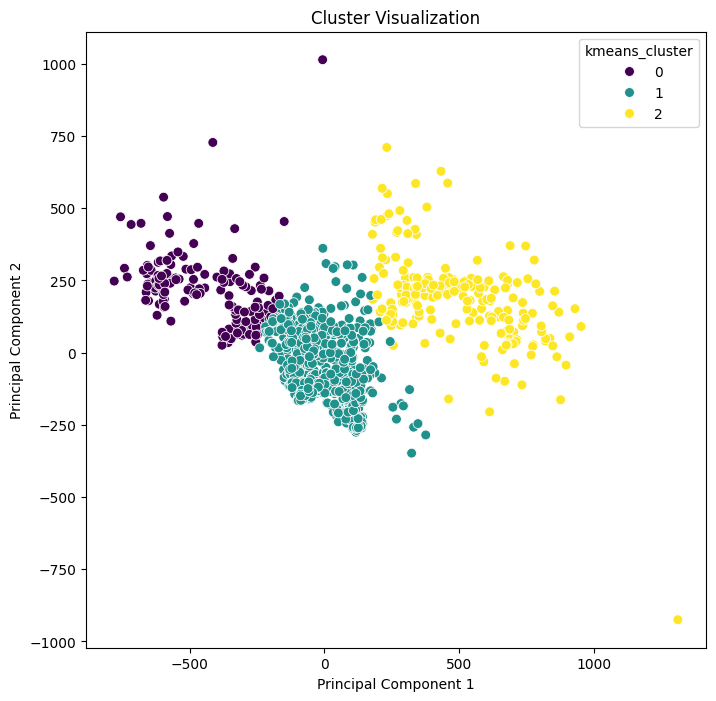

In [117]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_2, hue='kmeans_cluster', palette='viridis', s=50)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

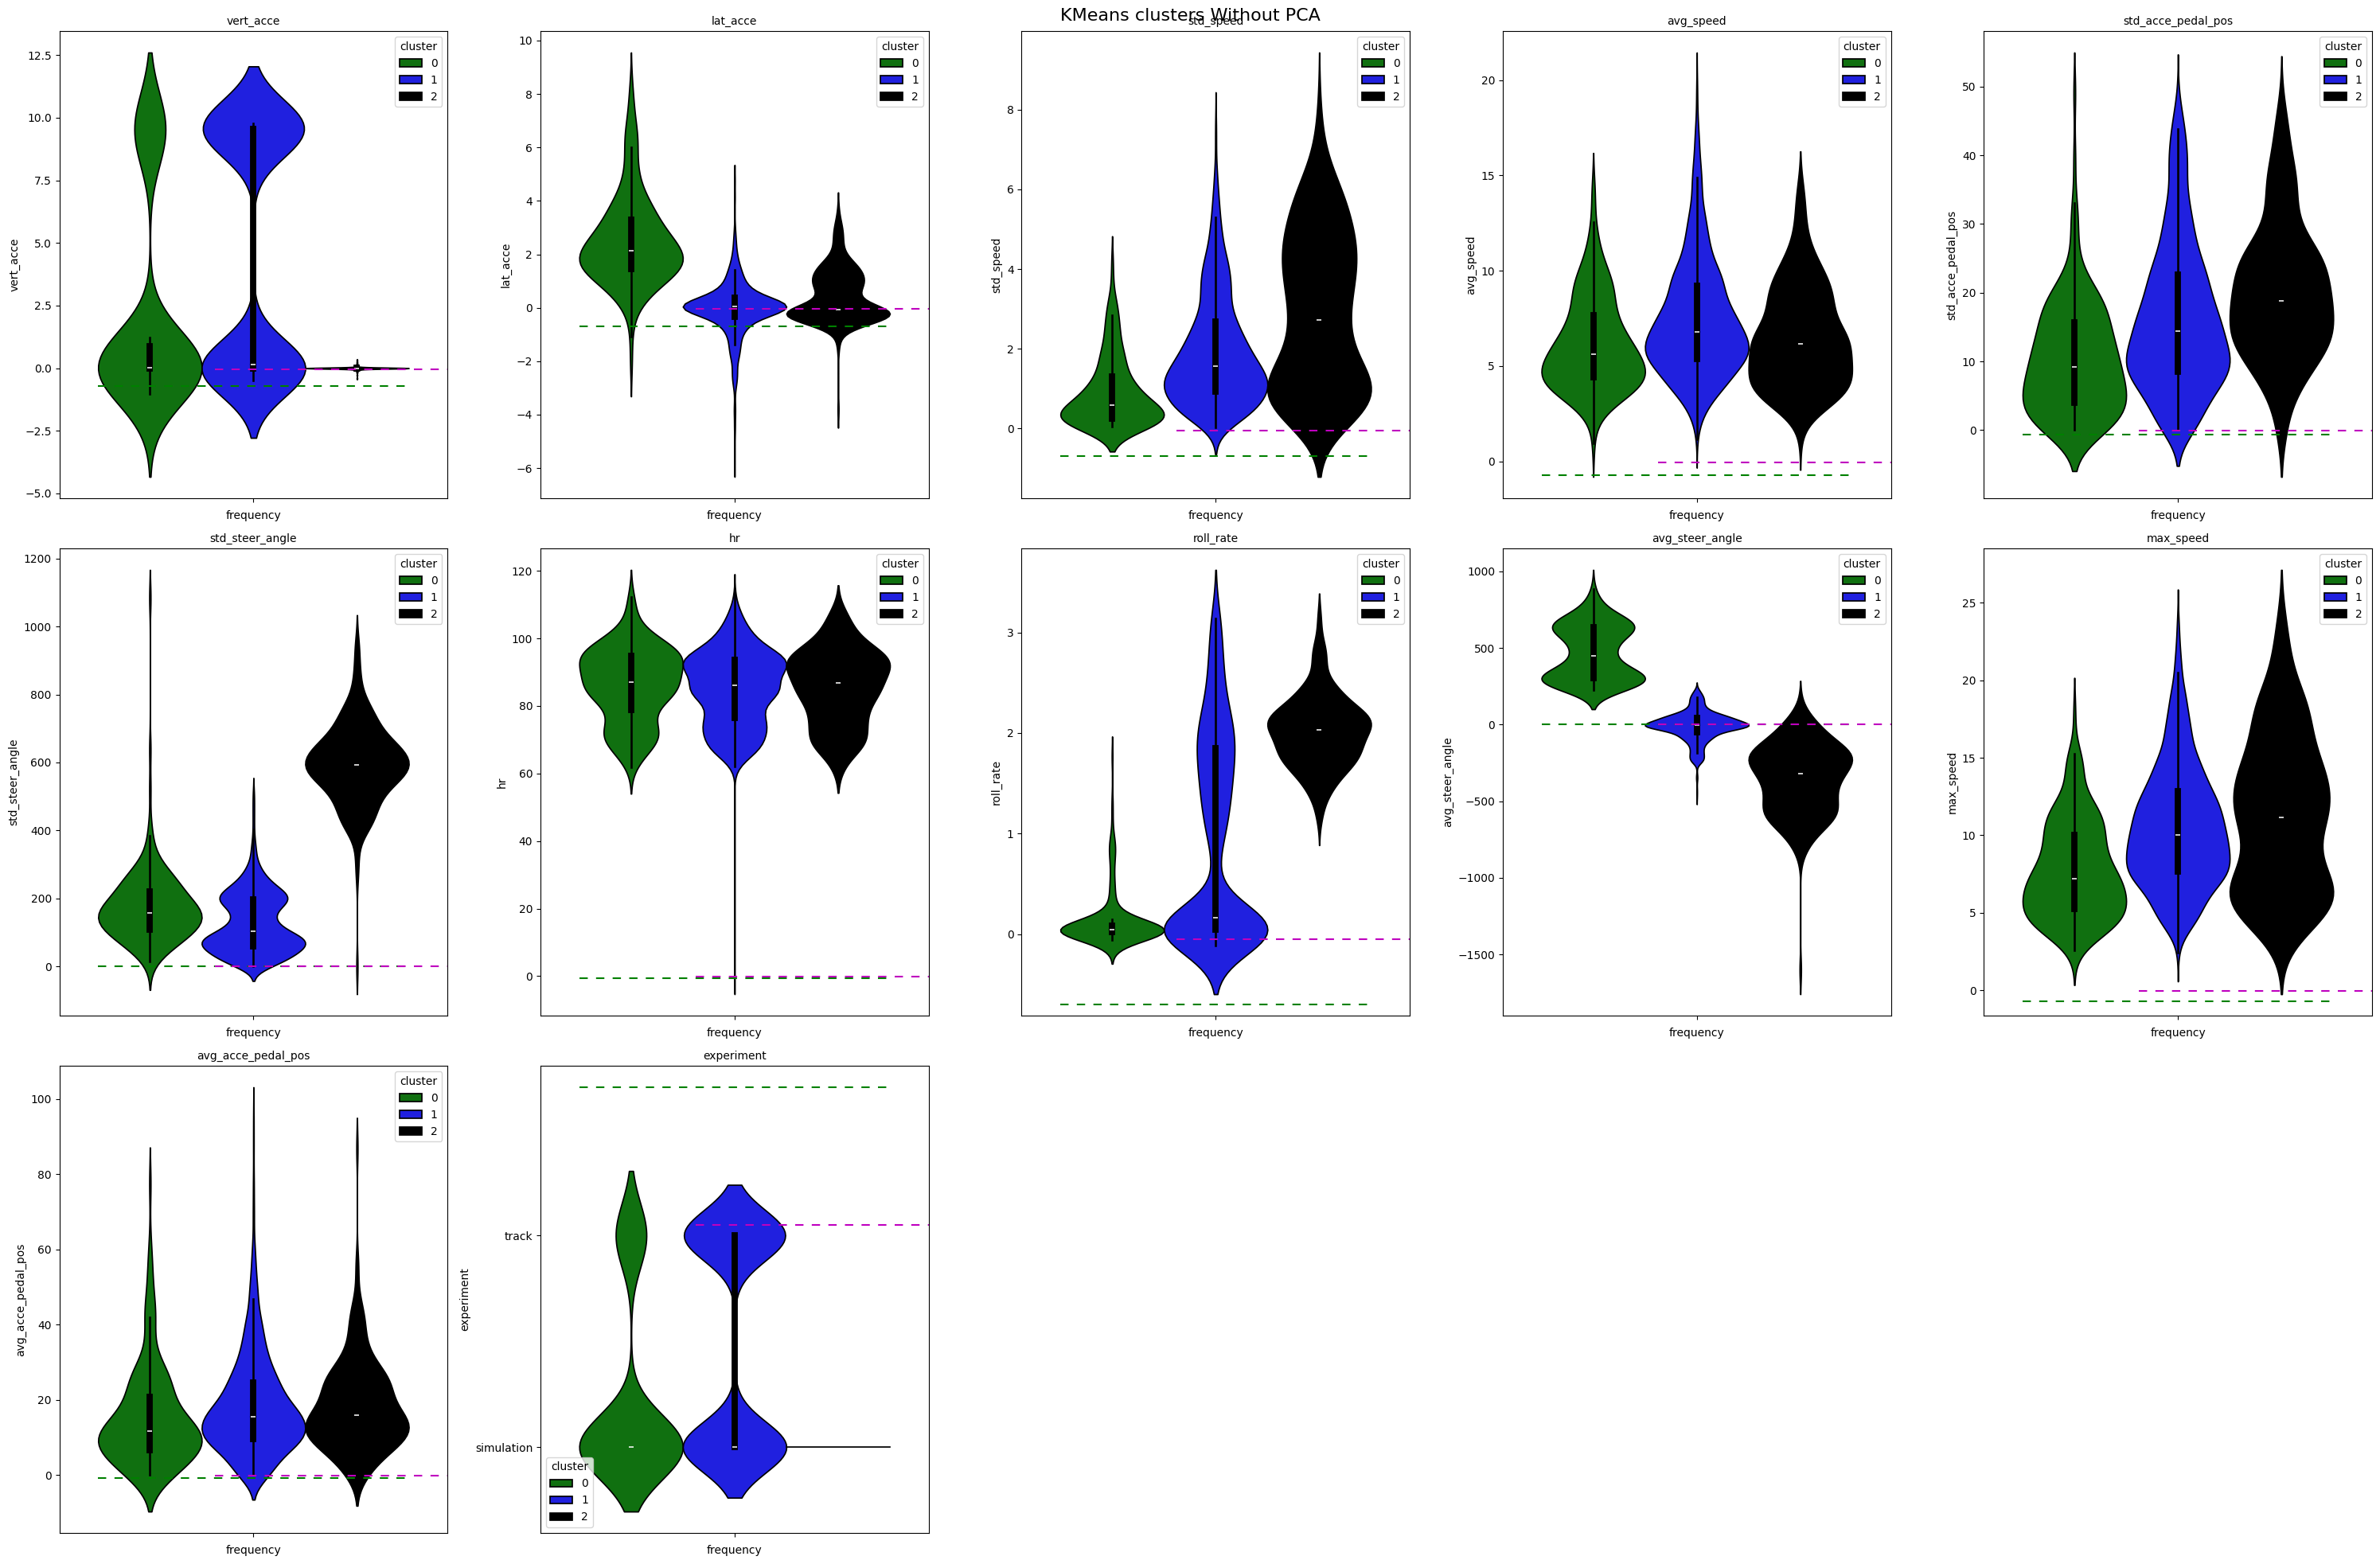

In [118]:
vis_features = list(set_contributors)
vis_features.append('experiment')
n_rows = 3
n_cols = 5
custom_colors = {0: 'green', 1: 'blue', 2:'black' }
plt.figure(figsize=(30,20))
plt.suptitle('KMeans clusters Without PCA', fontsize=16)
for i,col in enumerate(vis_features,1):
  plt.subplot(n_rows, n_cols, i)
  sns.violinplot(data=X, y=col, hue='cluster', palette= custom_colors)
  plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
  plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
  plt.title(f"{col}", fontsize = 10)
  plt.xlabel('frequency', size=10)
  plt.ylabel(f'{col}', size=10)
  plt.xticks(rotation=30, fontsize=8)
  plt.tight_layout()

plt.show()

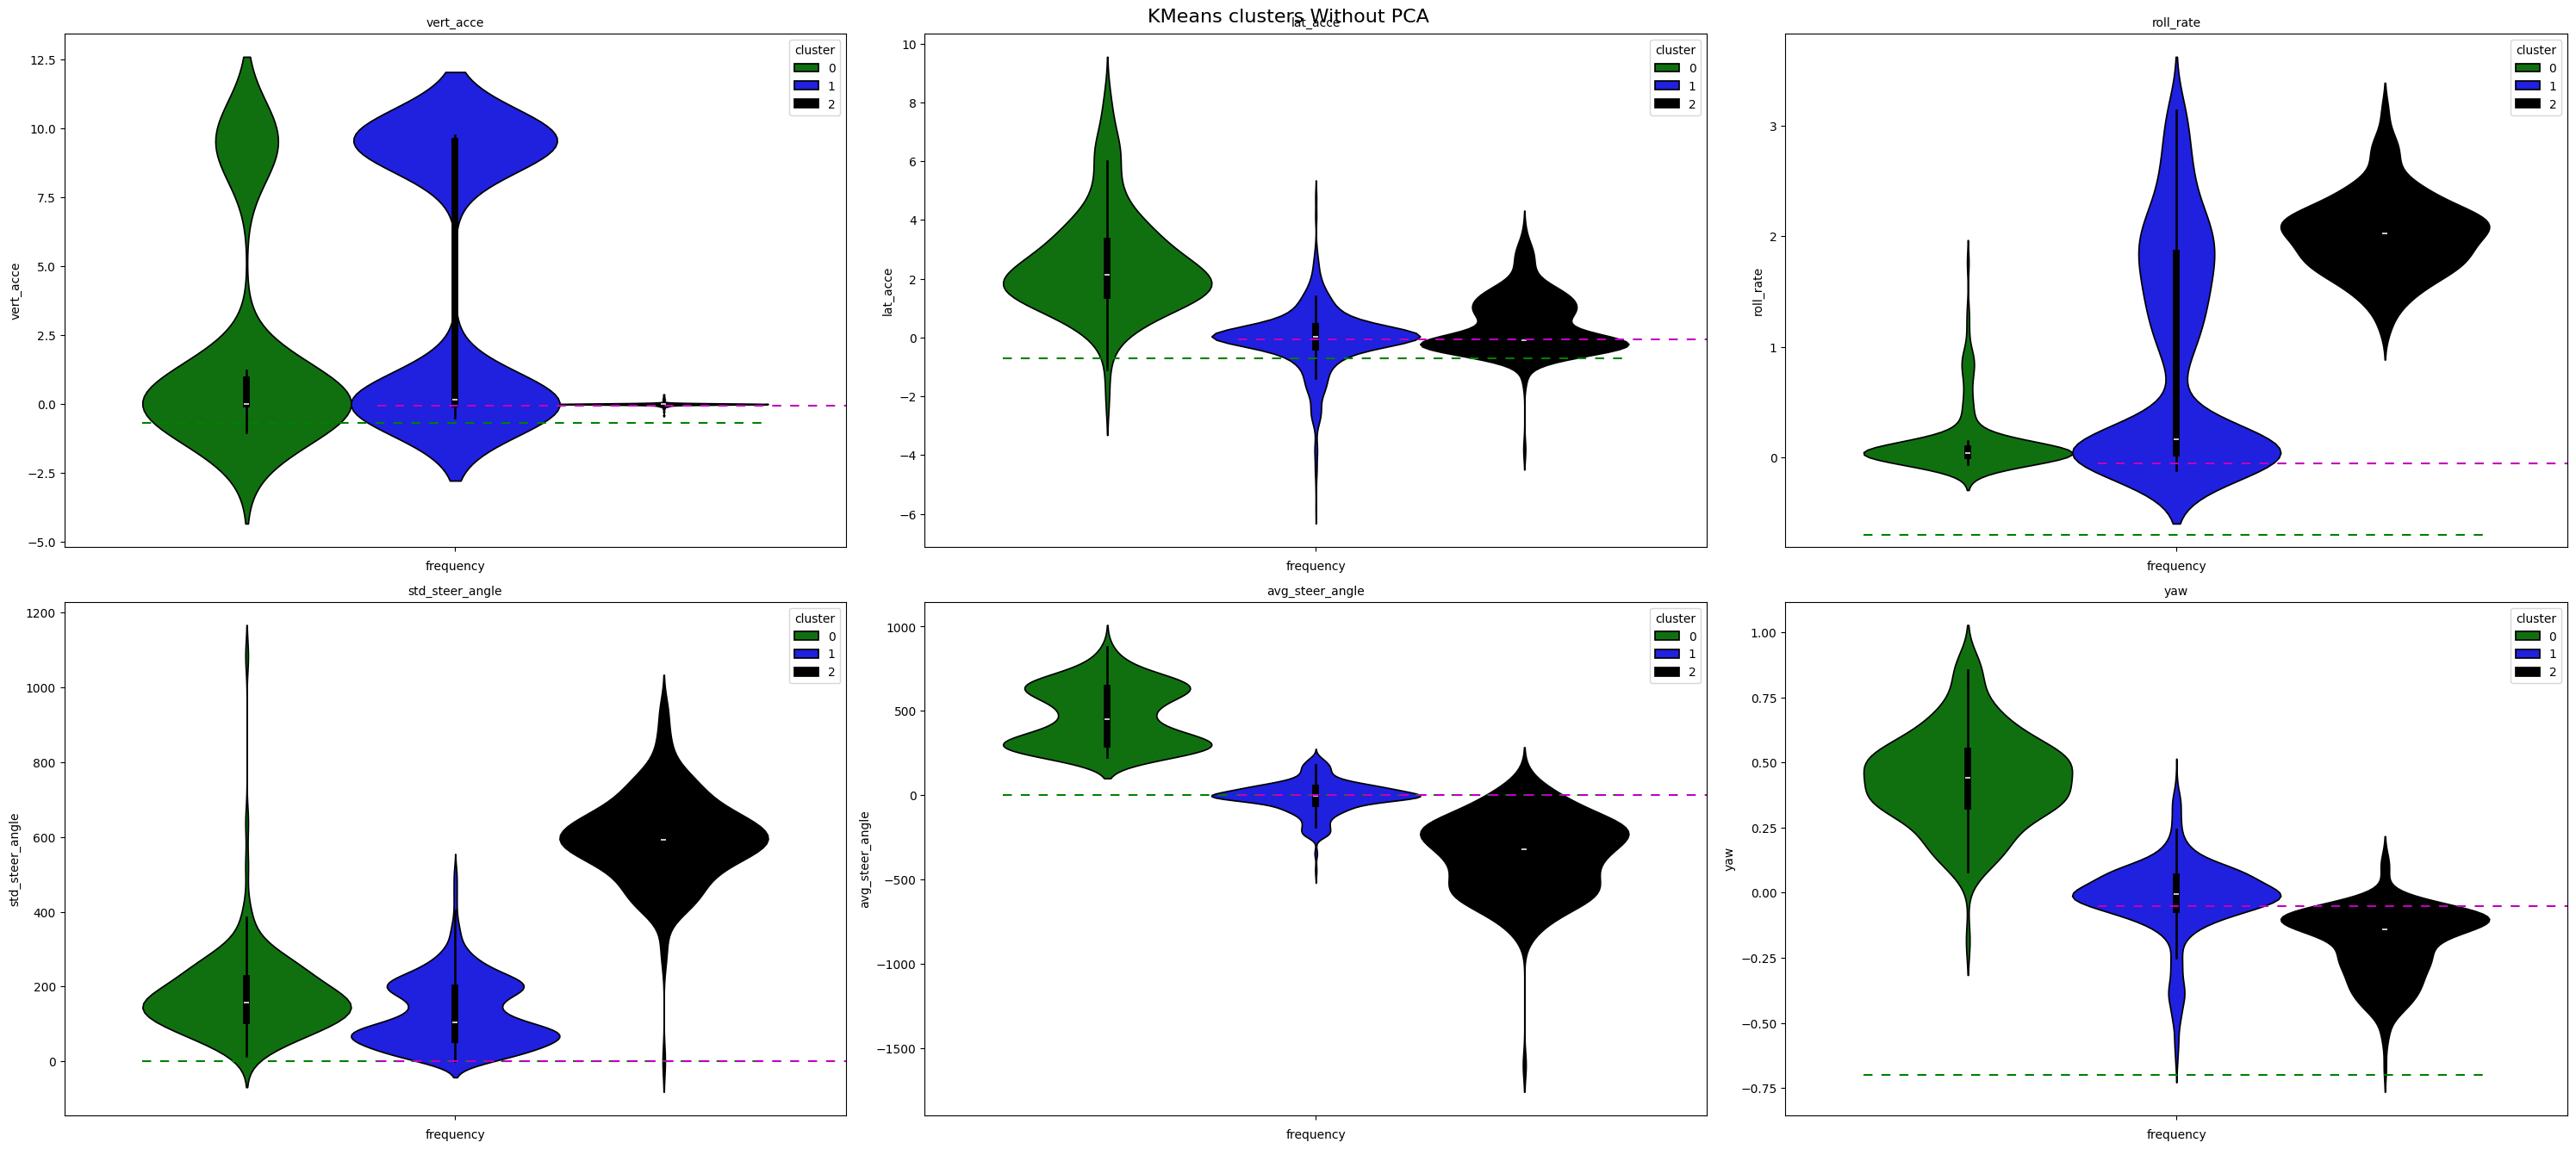

In [151]:
features_interest = ['vert_acce', 'lat_acce', 'roll_rate', 'std_steer_angle' ,'avg_steer_angle','yaw']

n_rows = 3
n_cols = 3
custom_colors = {0: 'green', 1: 'blue', 2:'black' }
plt.figure(figsize=(30,20))
plt.suptitle('KMeans clusters Without PCA', fontsize=16)
for i,col in enumerate(features_interest,1):
  plt.subplot(n_rows, n_cols, i)
  sns.violinplot(data=X, y=col, hue='cluster', palette= custom_colors)
  plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
  plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
  plt.title(f"{col}", fontsize = 10)
  plt.xlabel('frequency', size=10)
  plt.ylabel(f'{col}', size=10)
  plt.xticks(rotation=30, fontsize=8)
  plt.tight_layout()

plt.show()


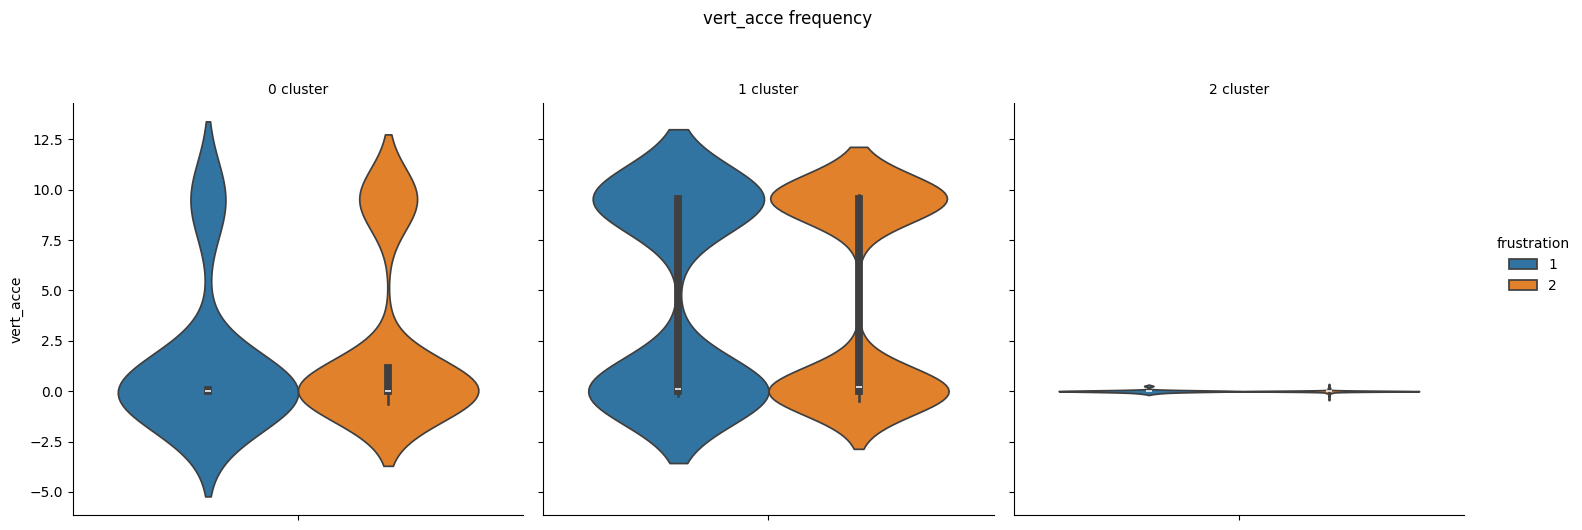

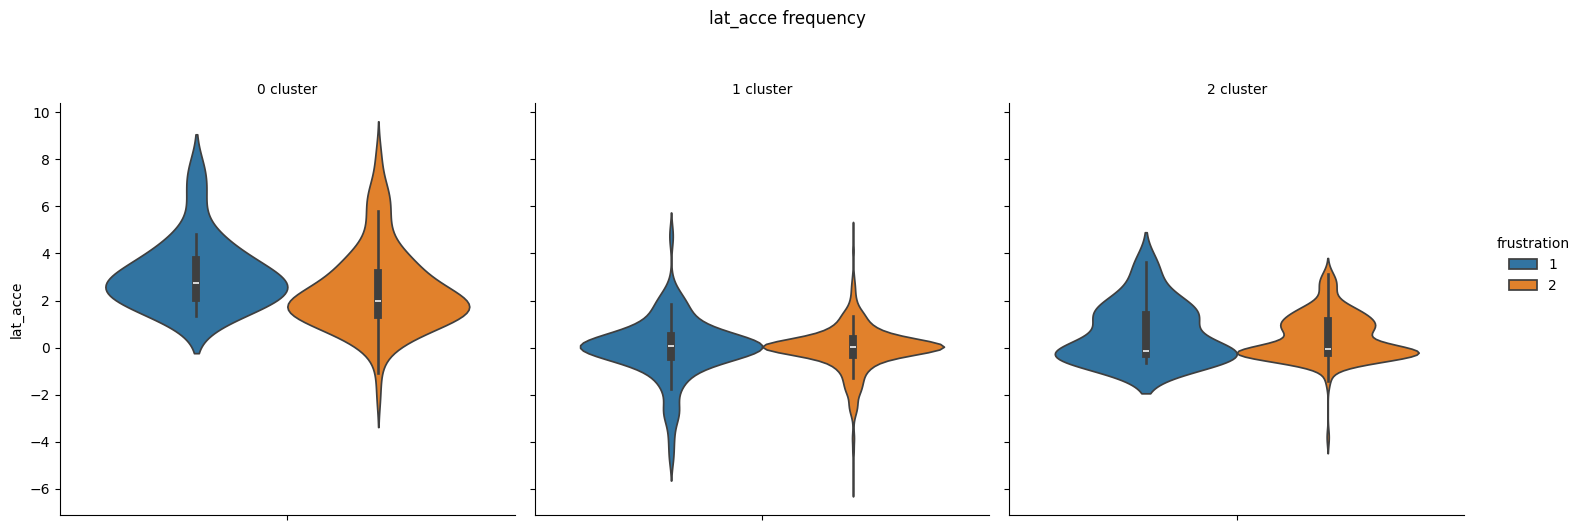

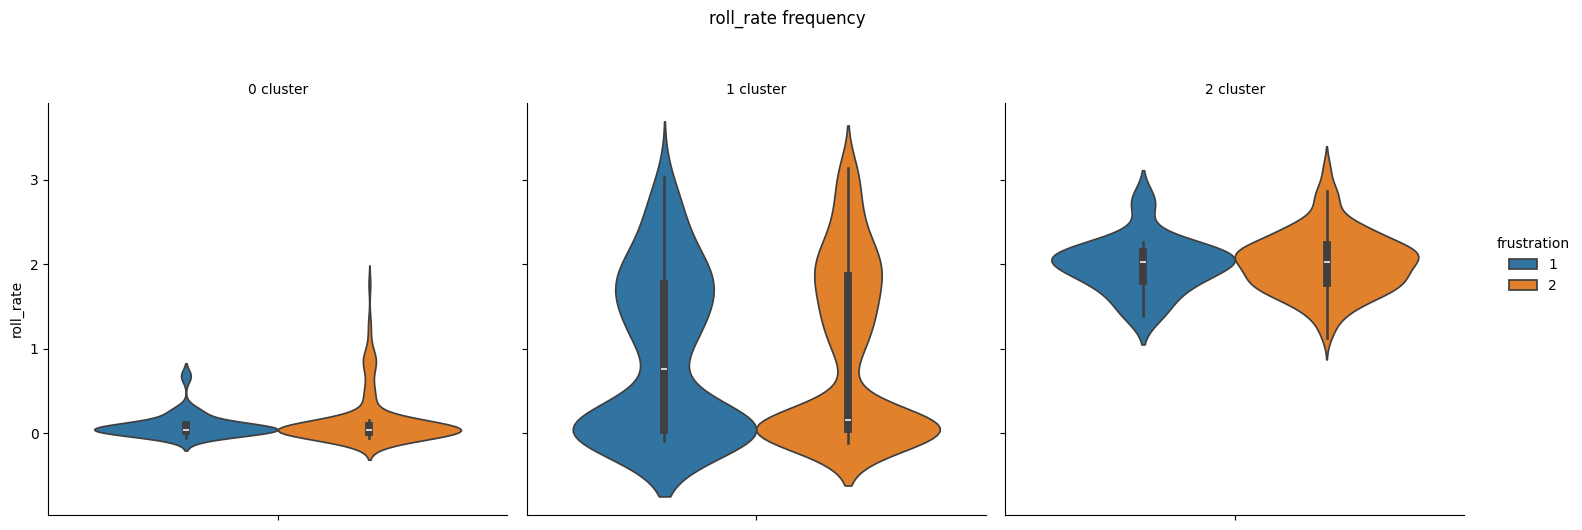

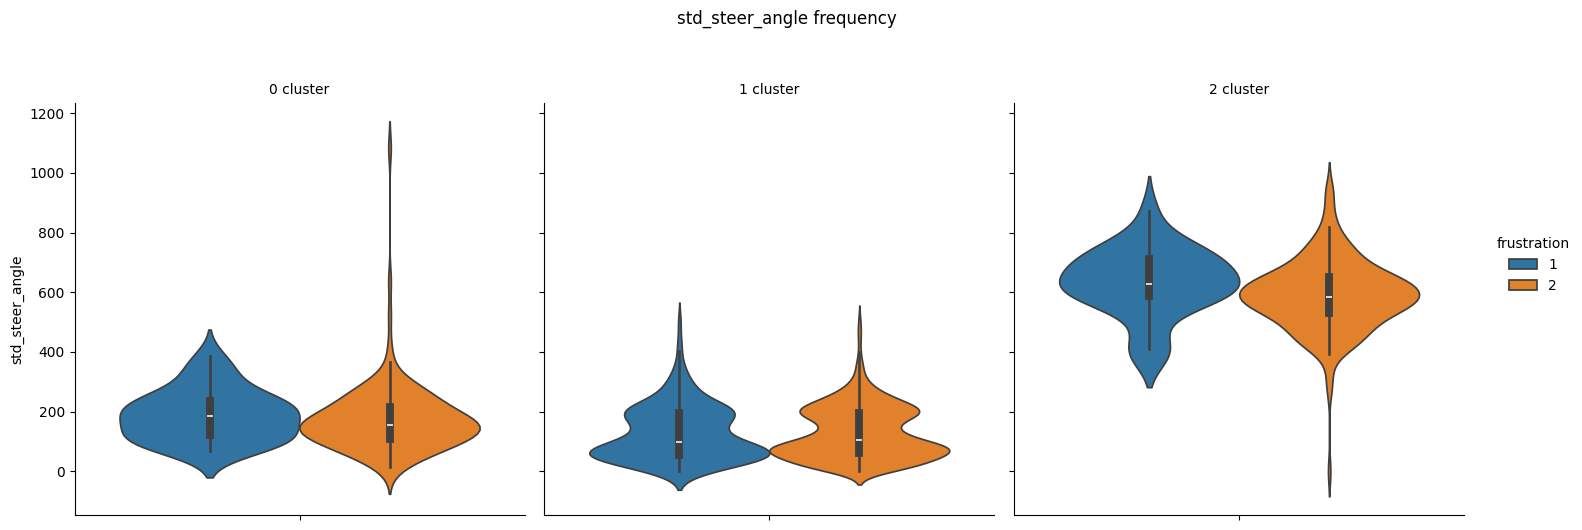

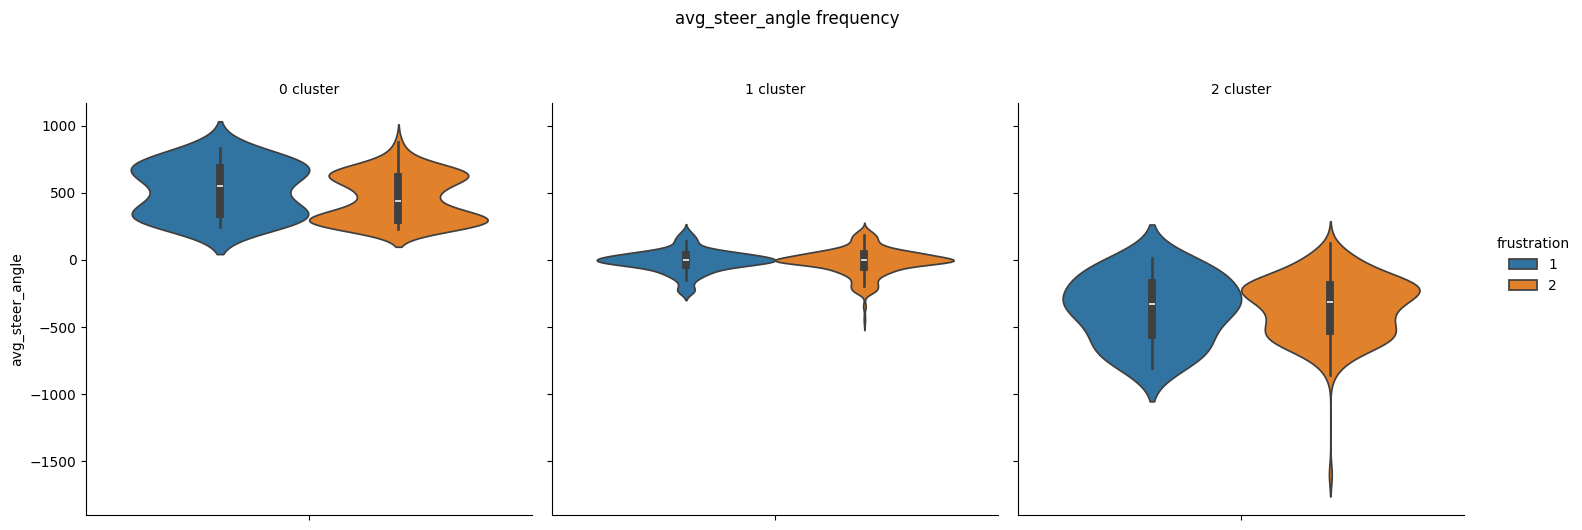

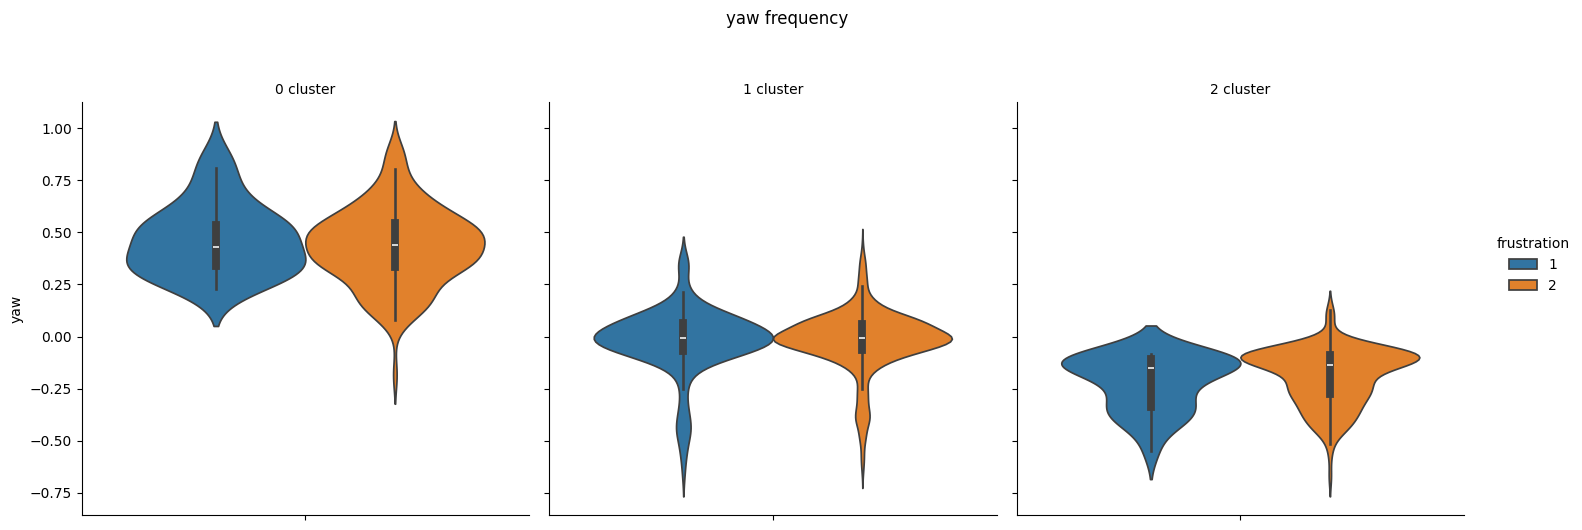

In [152]:
for column in features_interest:
    # Create catplot
    g = sns.catplot(data=X, y=column, hue='frustration', col='cluster',
                    kind='violin', height=5, aspect=1)

    # Set titles and adjust layout
    g.fig.suptitle(f'{column} frequency', y=1.05)
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.tight_layout()


    plt.show() # Show each catplot separately


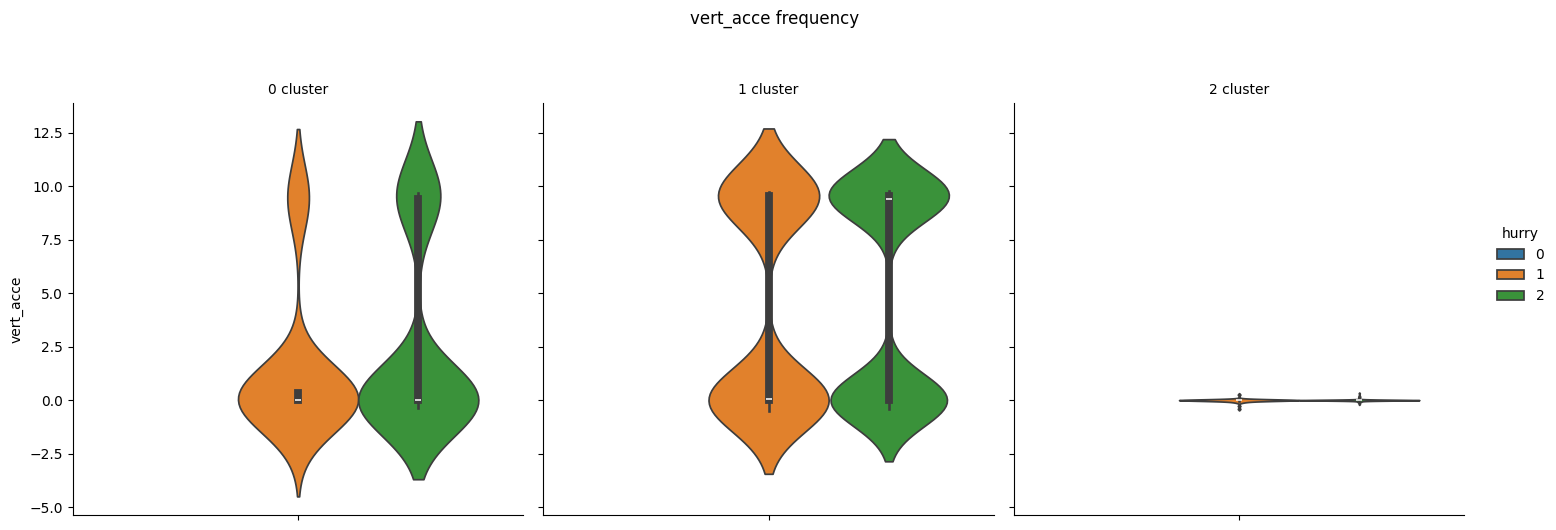

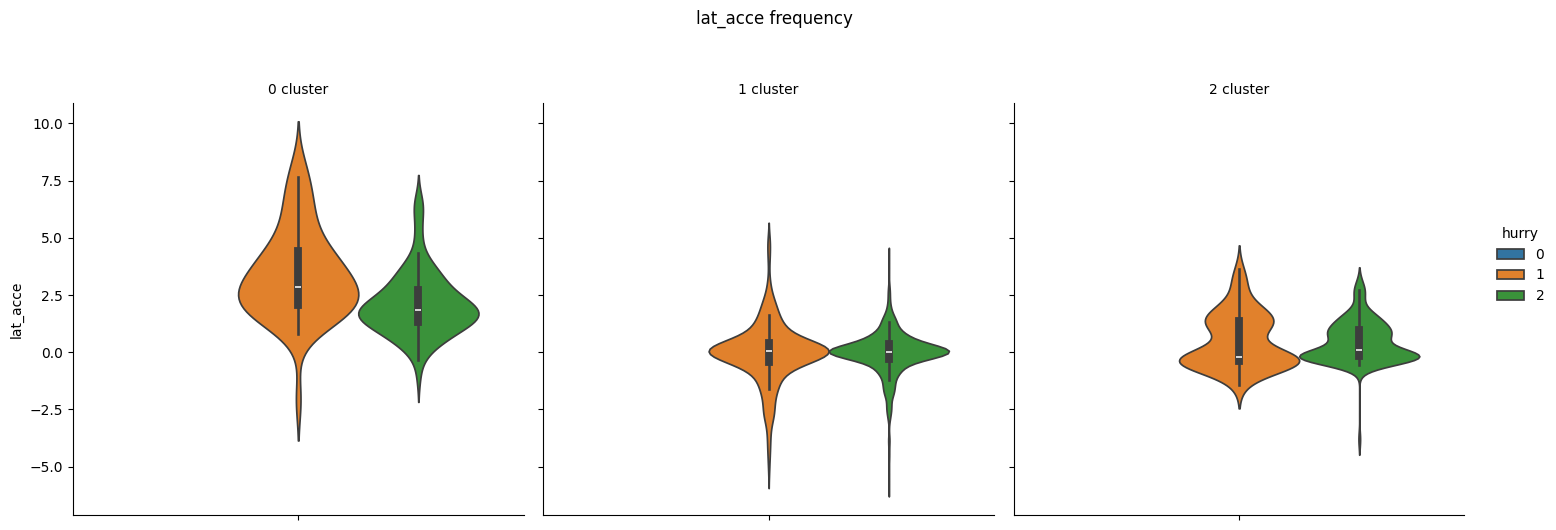

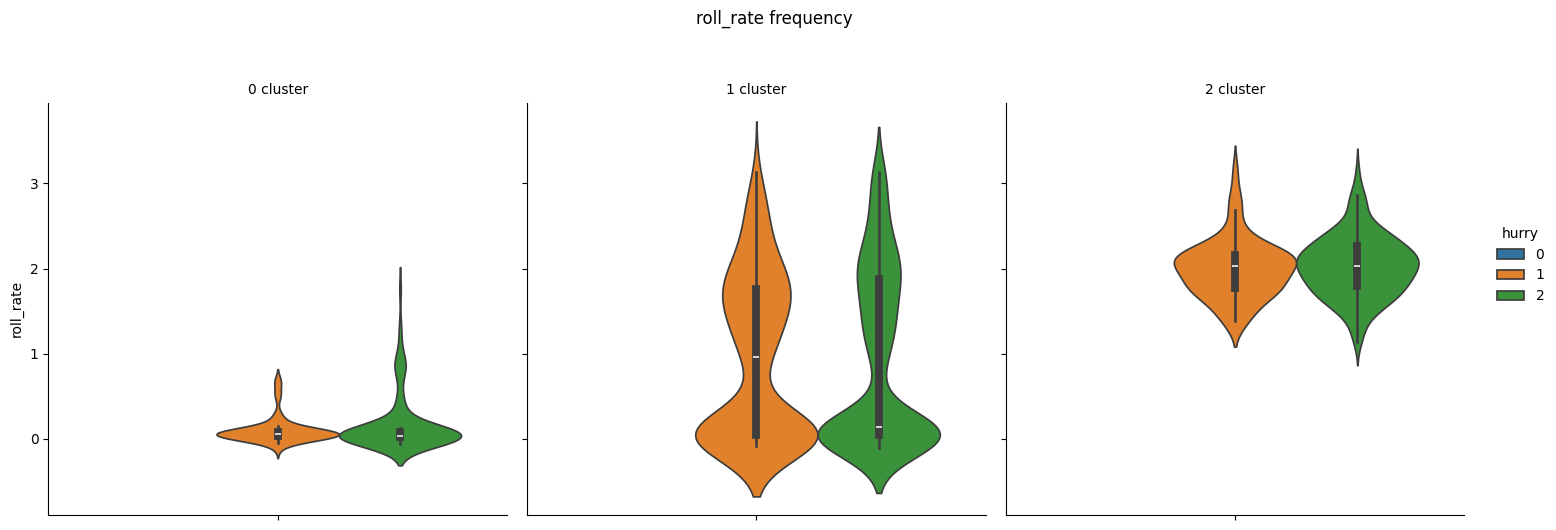

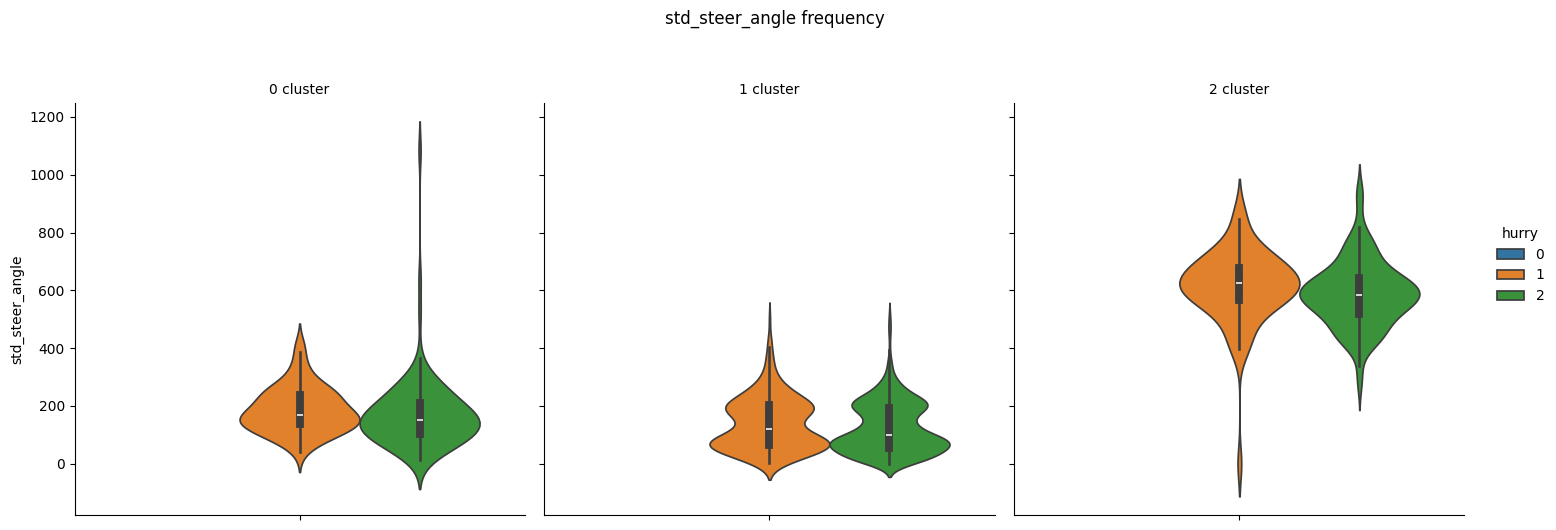

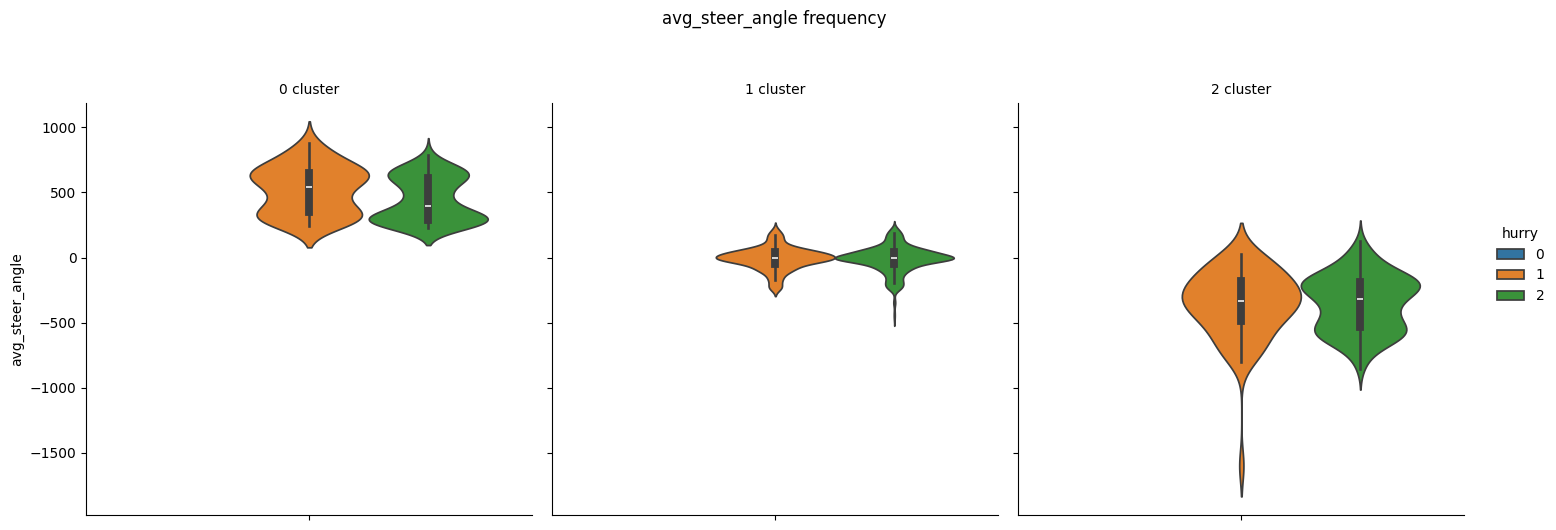

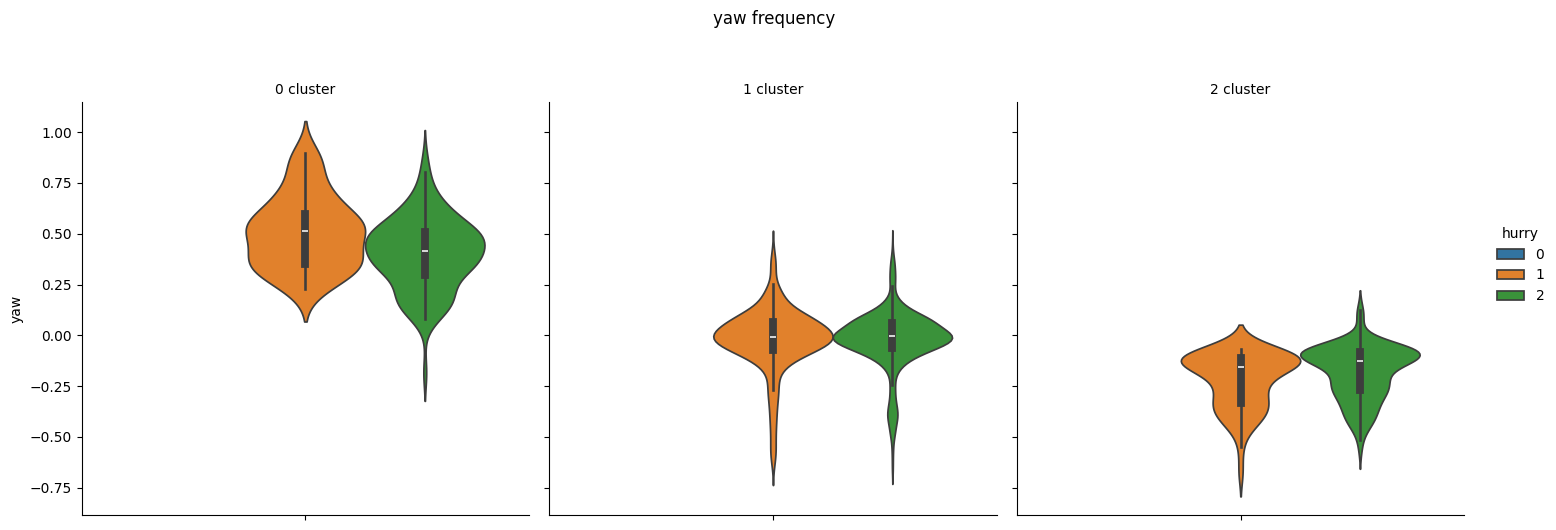

In [153]:
for column in features_interest:
    # Create catplot
    g = sns.catplot(data=X, y=column, hue='hurry', col='cluster',
                    kind='violin', height=5, aspect=1)

    # Set titles and adjust layout
    g.fig.suptitle(f'{column} frequency', y=1.05)
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.tight_layout()


    plt.show()

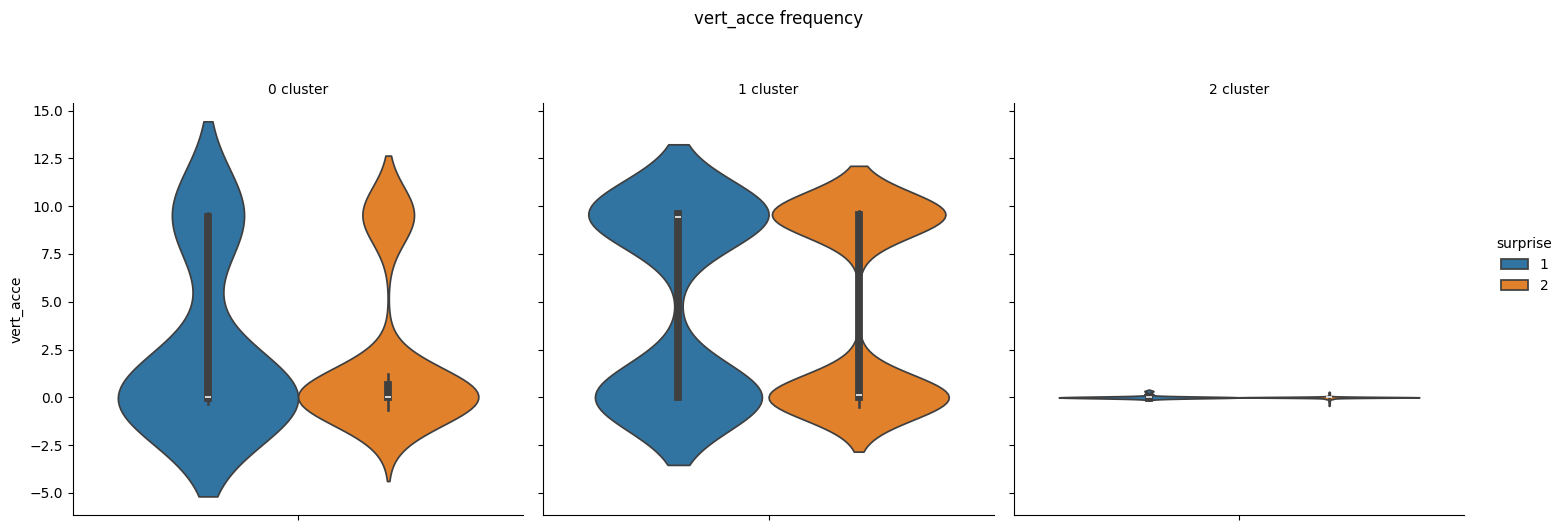

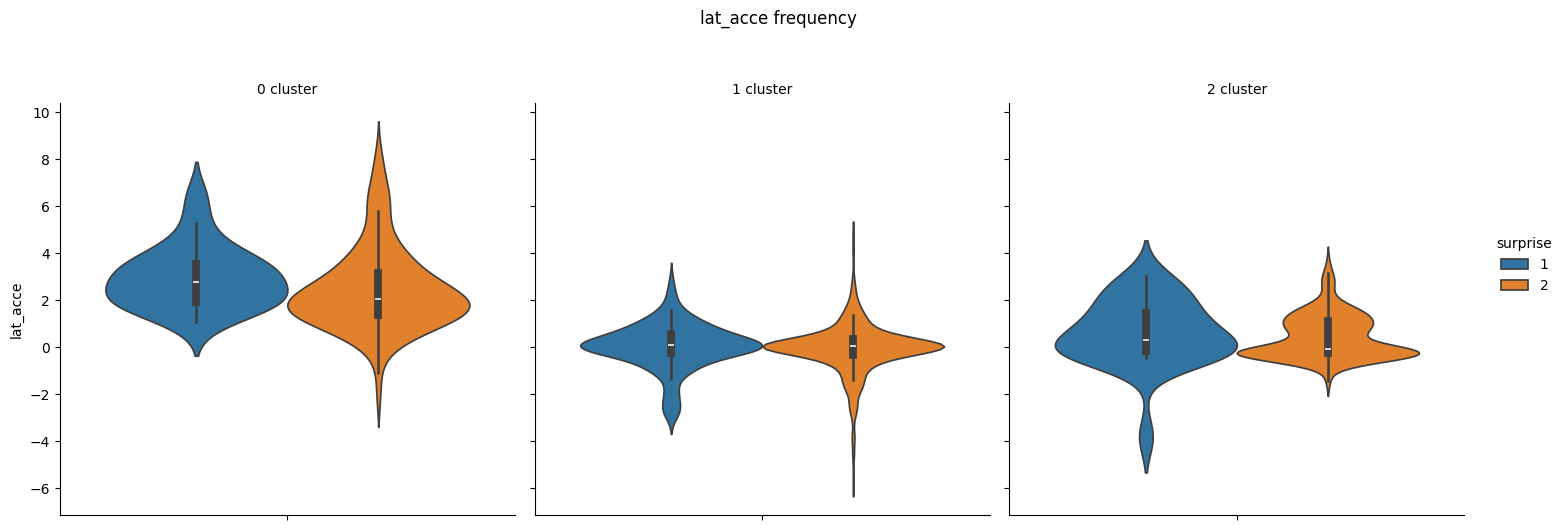

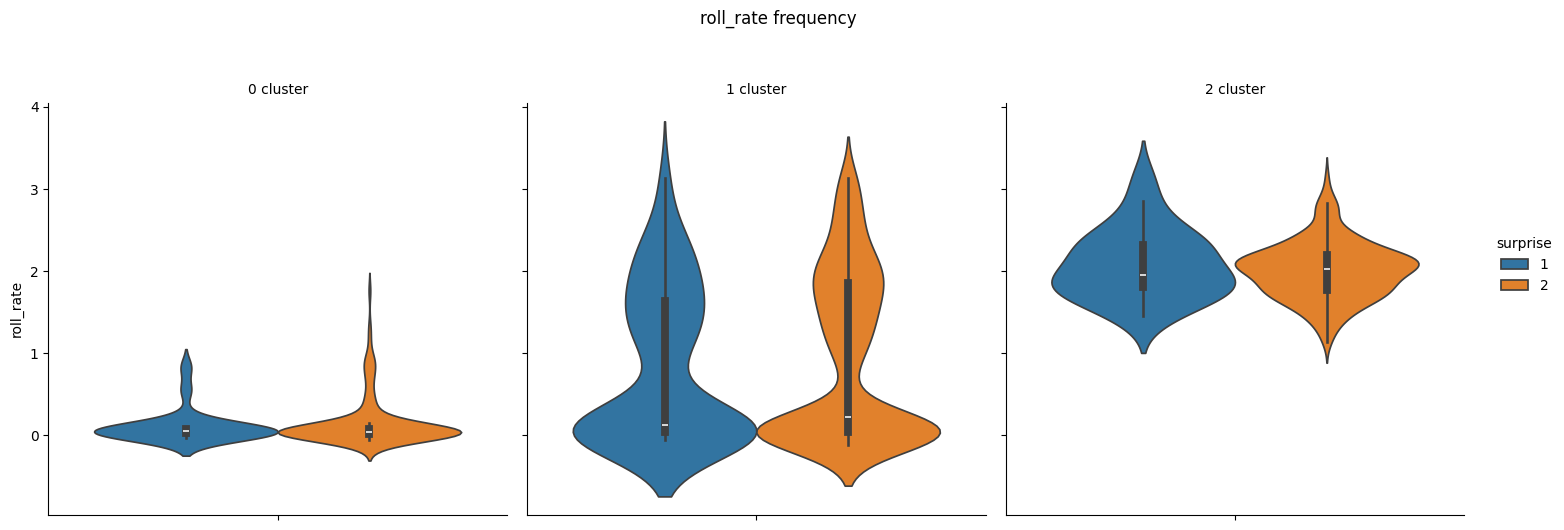

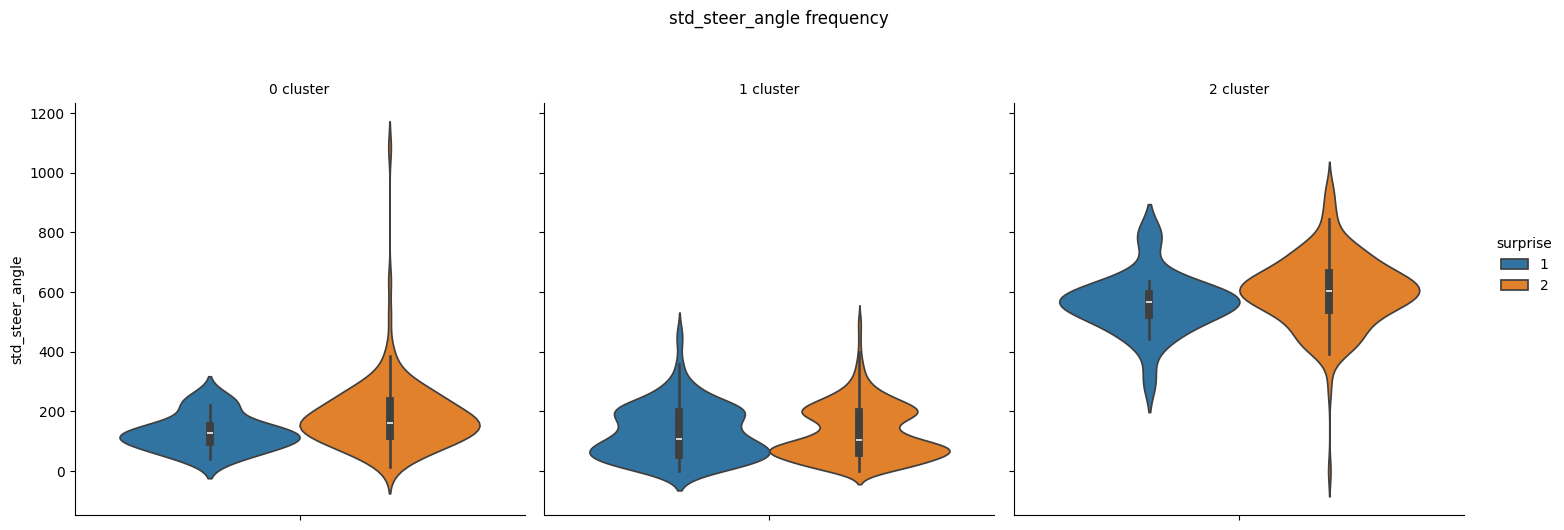

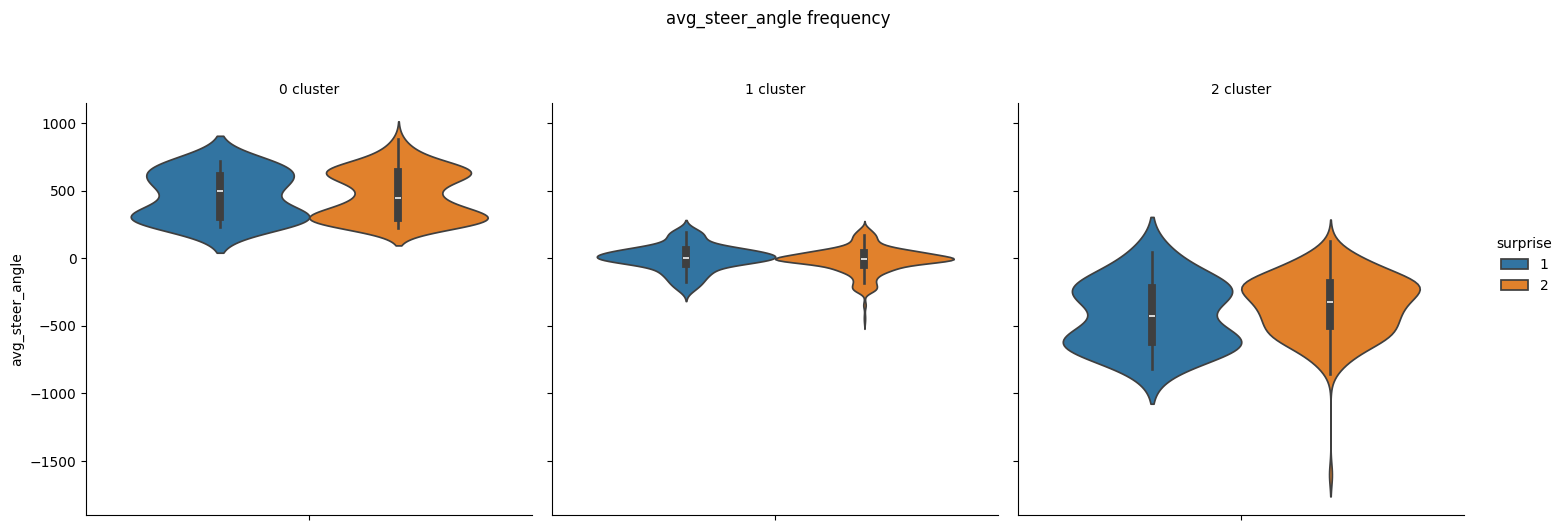

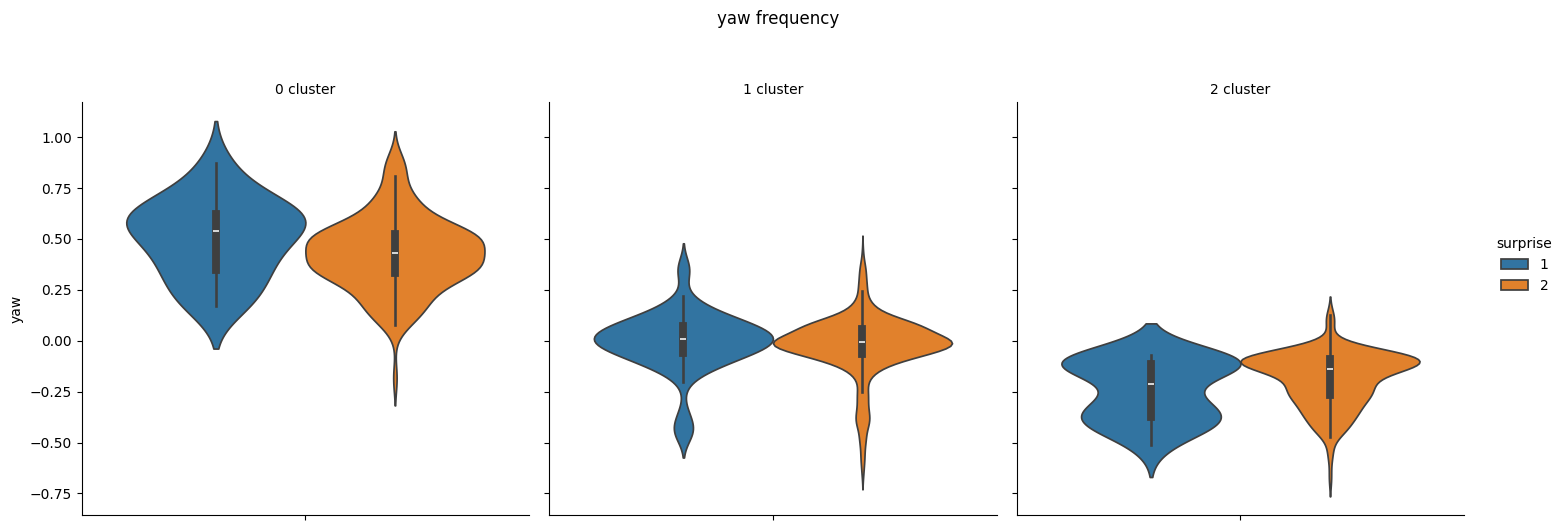

In [157]:
for column in features_interest:
    # Create catplot
    g = sns.catplot(data=X, y=column, hue='surprise', col='cluster',
                    kind='violin', height=5, aspect=1)

    # Set titles and adjust layout
    g.fig.suptitle(f'{column} frequency', y=1.05)
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.tight_layout()


    plt.show()

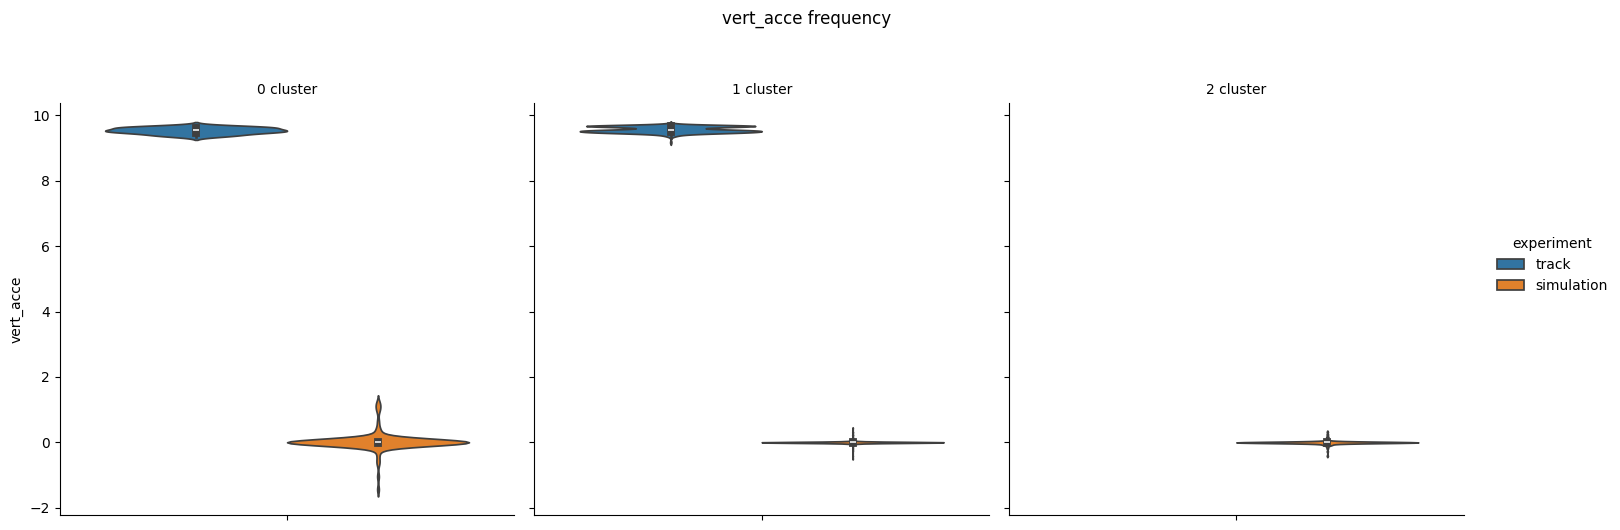

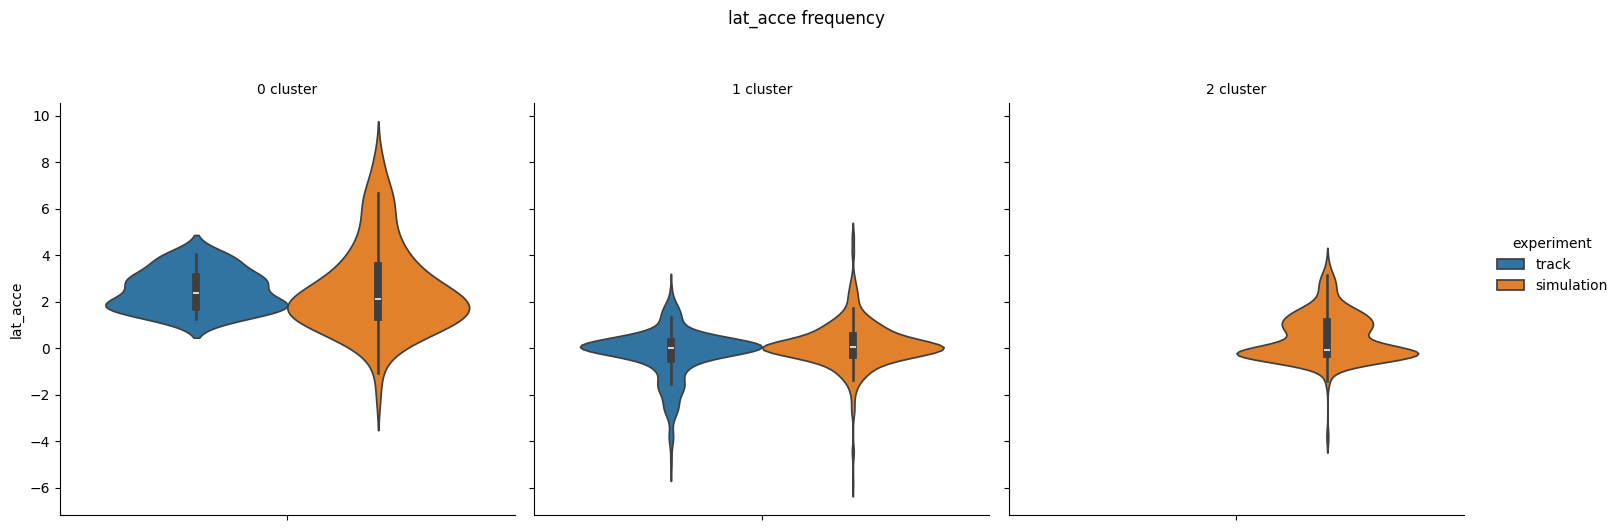

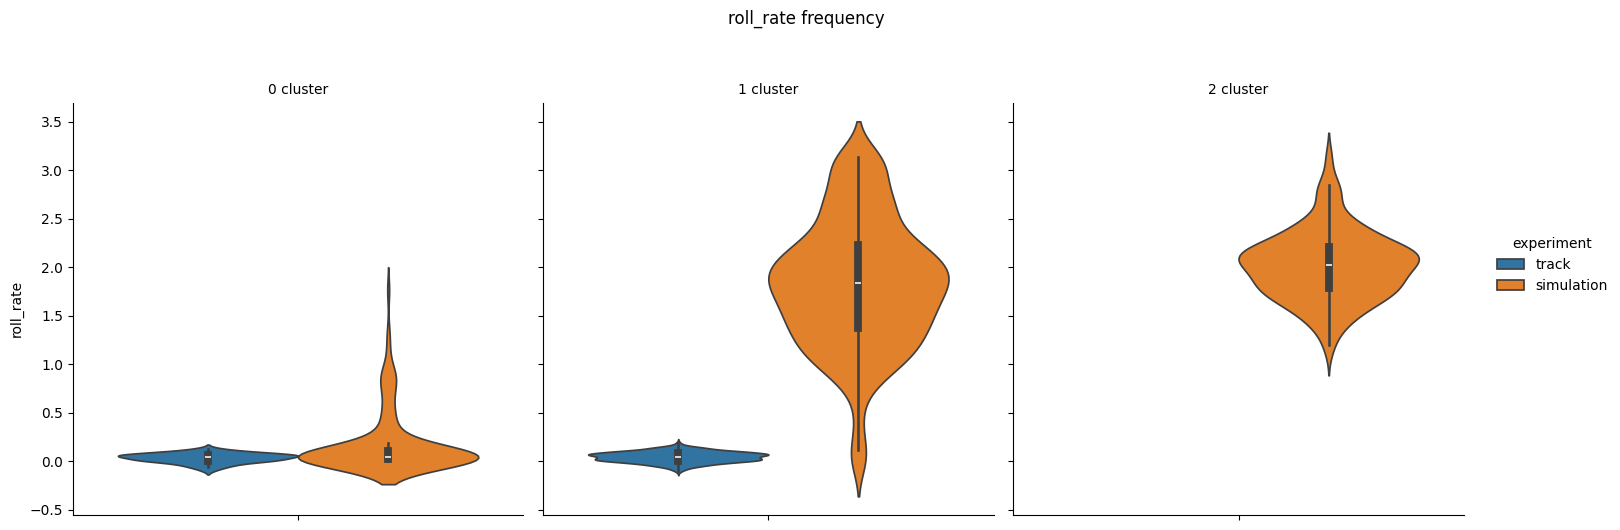

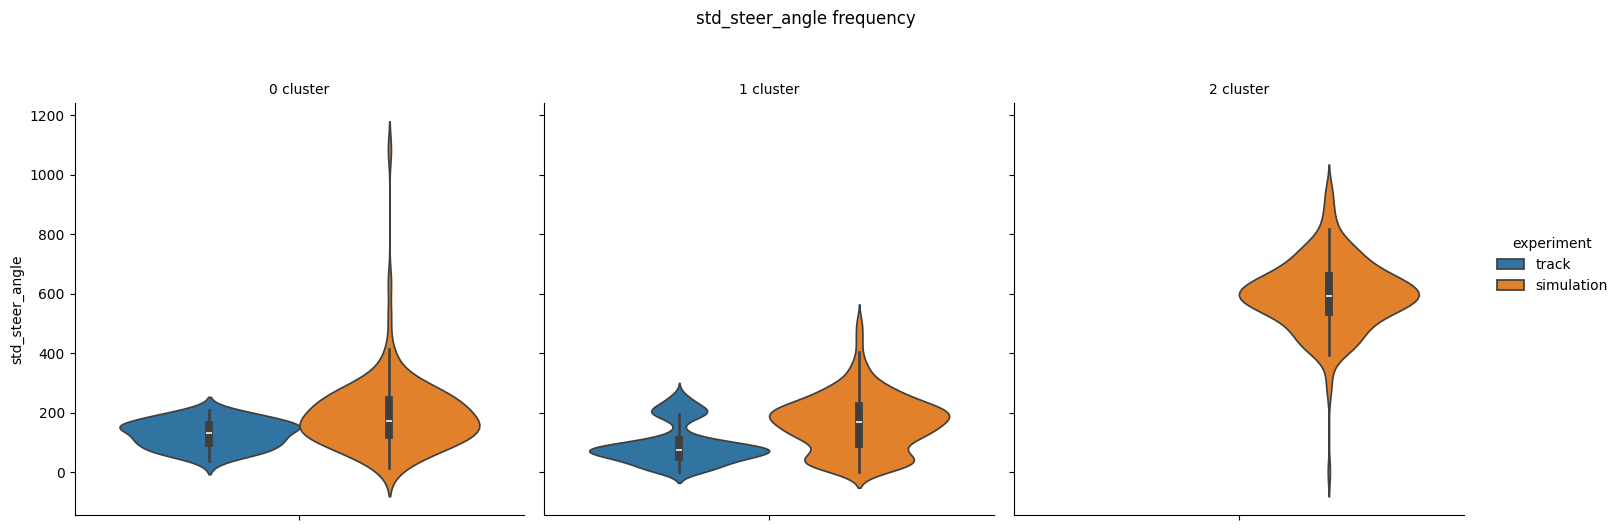

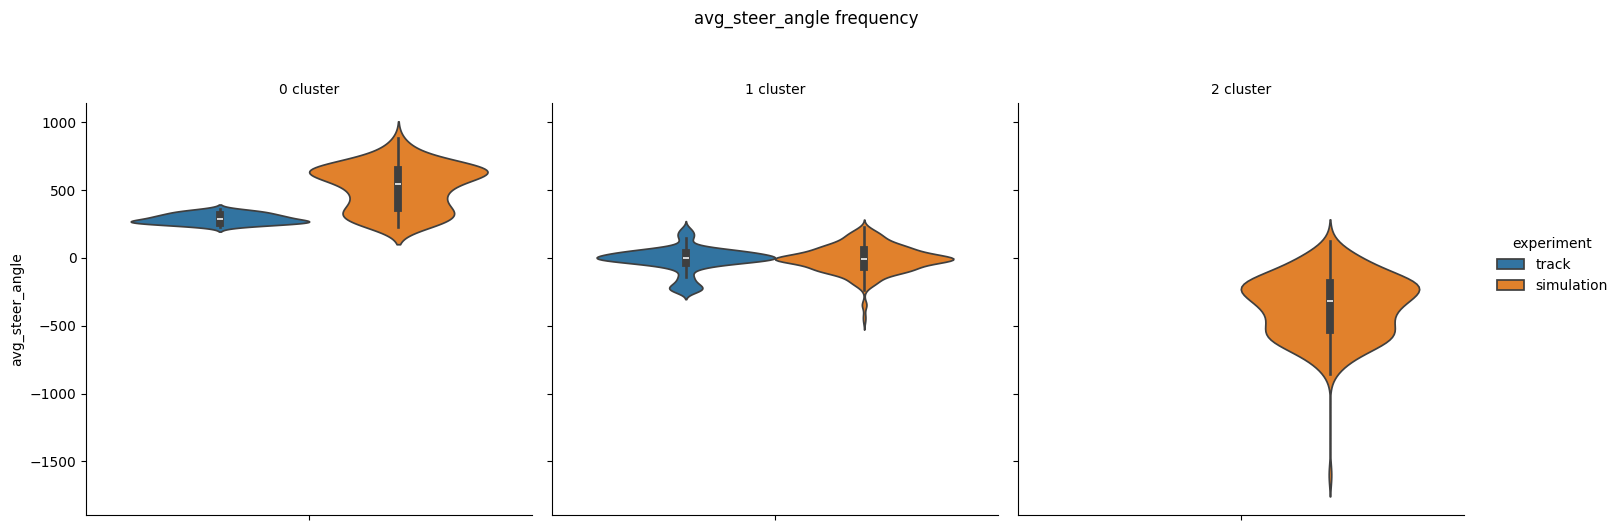

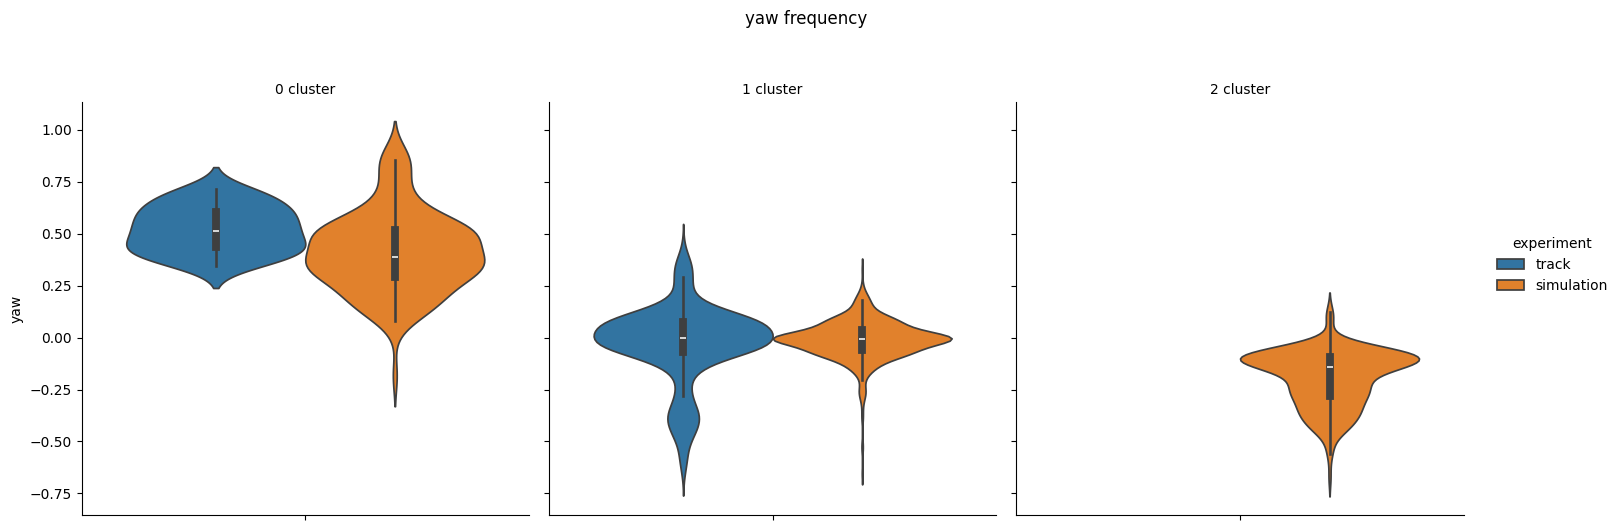

In [154]:
for column in features_interest:
    # Create catplot
    g = sns.catplot(data=X, y=column, hue='experiment', col='cluster',
                    kind='violin', height=5, aspect=1)

    # Set titles and adjust layout
    g.fig.suptitle(f'{column} frequency', y=1.05)
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.tight_layout()


    plt.show()

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report,confusion_matrix

def evaluate_model(model,X_test,y_test):
  pred = model.predict(X_test)

  accuracy = accuracy_score(y_true=y_test, y_pred= pred)
  f1 = f1_score(y_true=y_test, y_pred= pred, average= 'macro')
  precision = precision_score (y_true=y_test, y_pred= pred, average= 'macro')
  recall = recall_score(y_true=y_test, y_pred= pred, average= 'macro')
  cm = confusion_matrix(y_true=y_test, y_pred=pred)

  cm_display = ConfusionMatrixDisplay(cm).plot()
  print(f"{type(model).__name__}\n{classification_report(y_test, pred)}")

  return {'f1':f1,'acc':accuracy,'precision':precision,'recall':recall}

In [170]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

dt_model = DecisionTreeClassifier(max_depth=4, random_state=2)

# dt_model = RandomForestClassifier(n_estimators= 100,  warm_start=True, max_depth=4, random_state=42)
X_cl = X.drop(['experiment', 'cluster'], axis=1)
y_cl = X['cluster']
X_train, X_test, y_train, y_test = train_test_split(X_cl, y_cl, test_size =0.2,shuffle = True, stratify = y_cl, random_state=42)
dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test)



DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.99      1.00      1.00       257
           2       1.00      0.95      0.98        43

    accuracy                           0.99       332
   macro avg       1.00      0.98      0.99       332
weighted avg       0.99      0.99      0.99       332



{'f1': 0.9907715023994094,
 'acc': 0.9939759036144579,
 'precision': 0.9974259974259975,
 'recall': 0.9844961240310077}

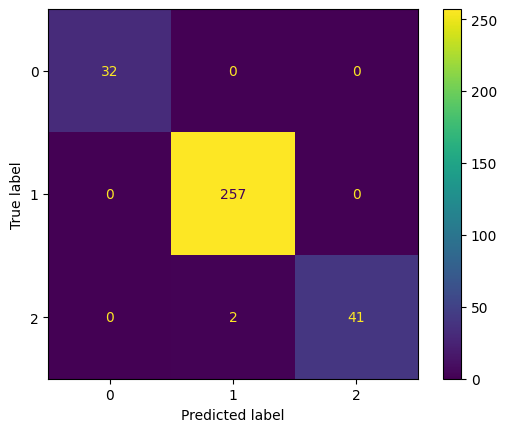

In [171]:
evaluate_model(dt_model, X_test, y_test)

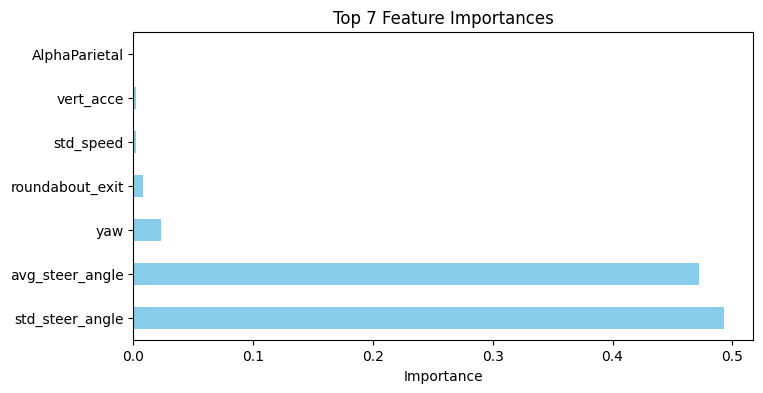

In [172]:
# Assuming dt_model is your trained RandomForestClassifier
# and X_cl is the DataFrame used for training (excluding the target variable)

# Extracting feature importances
feature_importances = dt_model.feature_importances_

# Extracting feature names
feature_names = X_cl.columns

# Creating a pandas Series for the feature importances with the feature names as index
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# Sorting the feature importances for better visualization and selecting the top 5
sorted_feature_importances = feature_importances_series.sort_values(ascending=False).head(7)

# Plotting the top 5 feature importances
plt.figure(figsize=(8, 4))
sorted_feature_importances.plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.title('Top 7 Feature Importances')
plt.show()

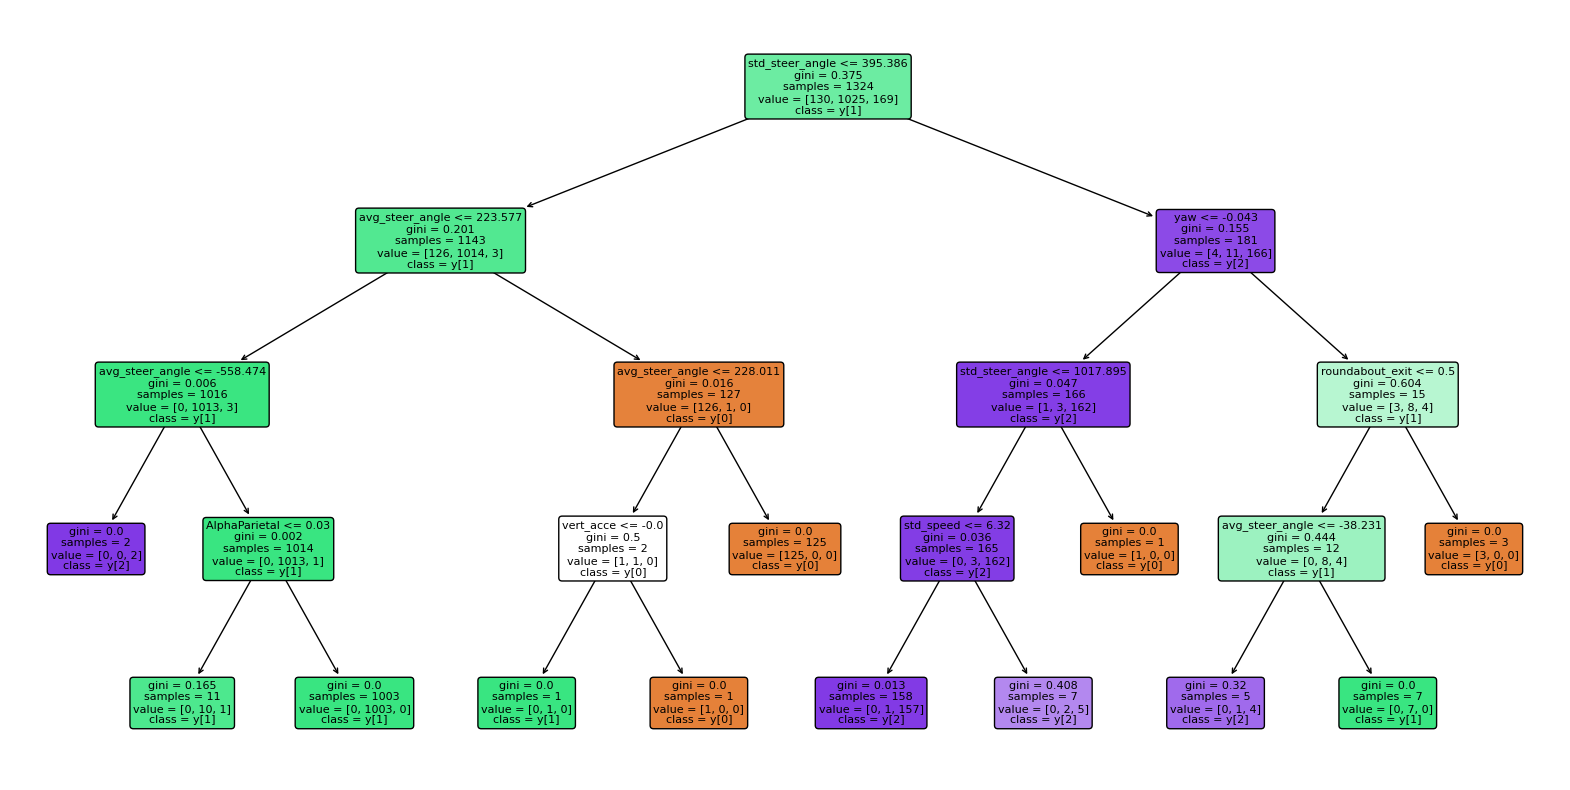

In [149]:
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          filled=True,
          feature_names=X_train.columns,
          class_names=True,
          rounded=True)
plt.show()

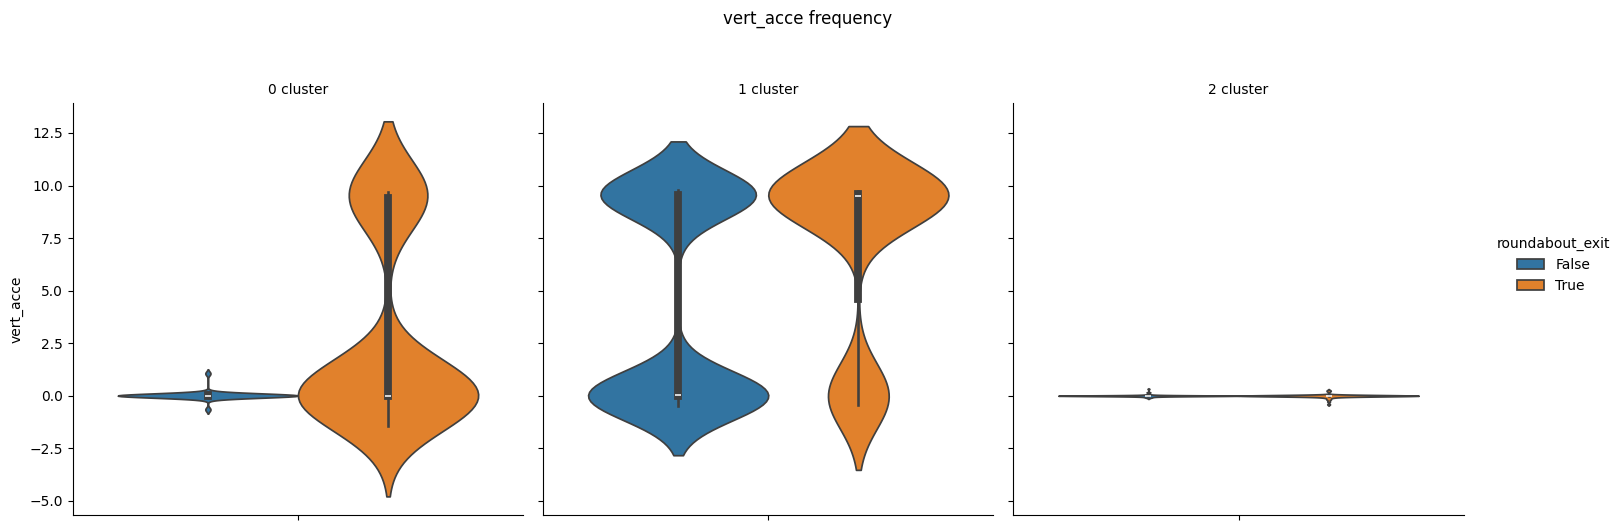

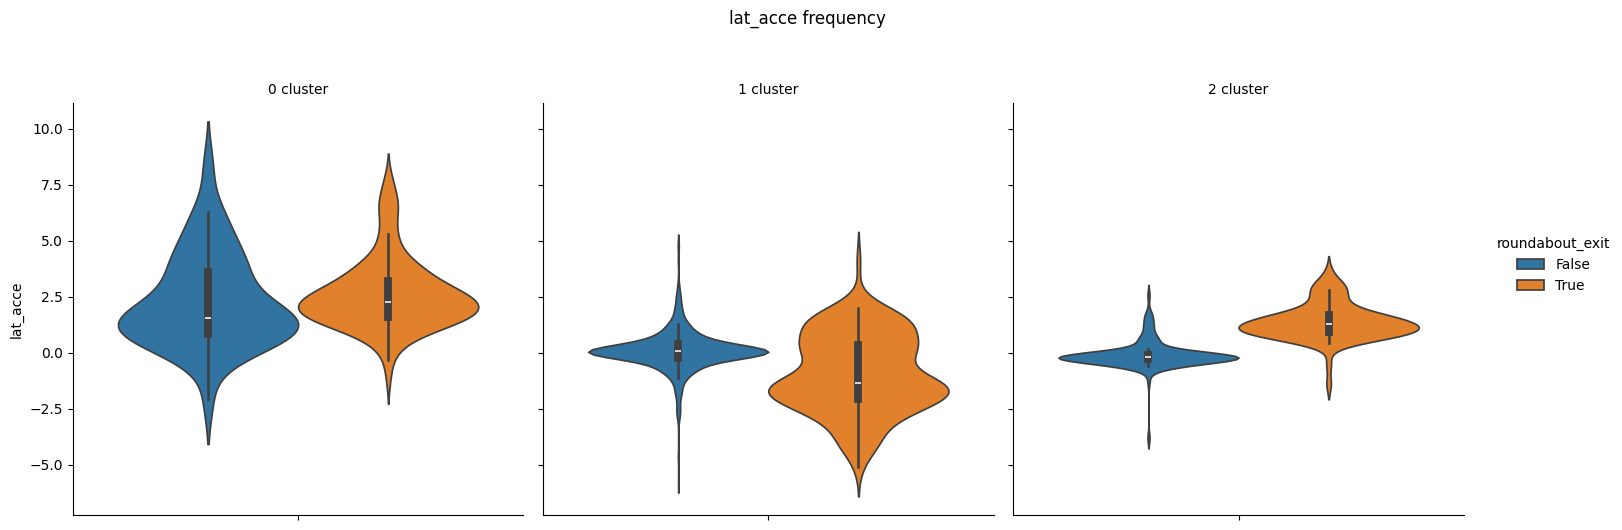

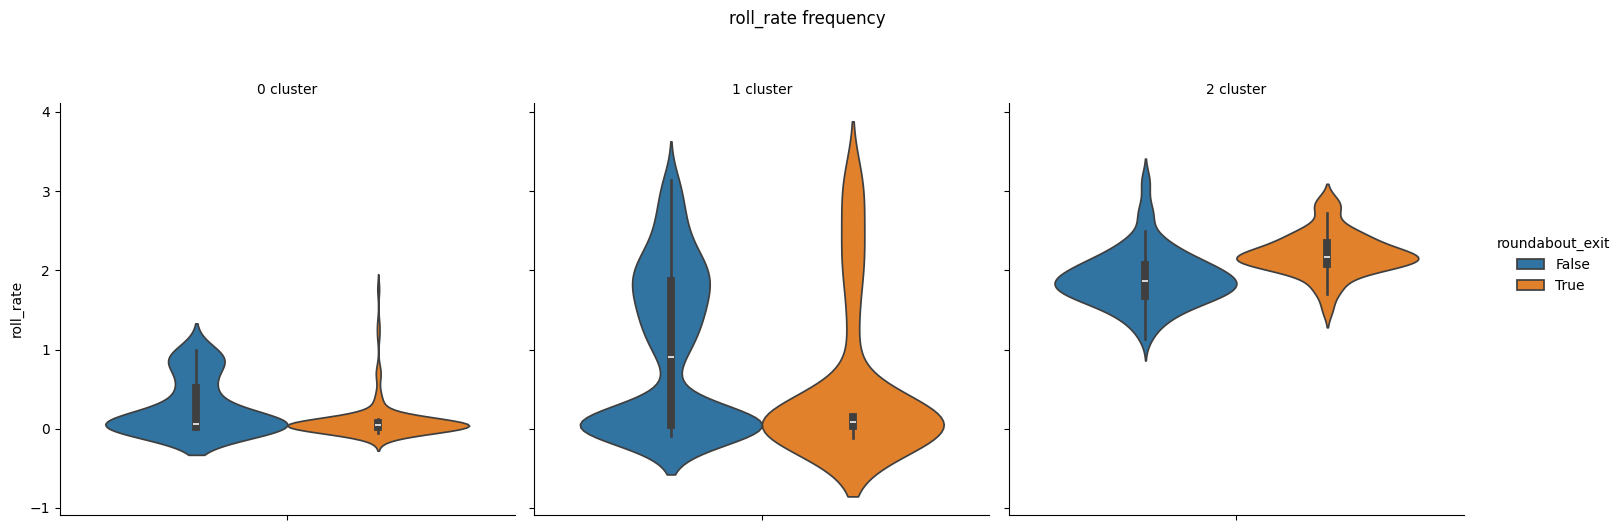

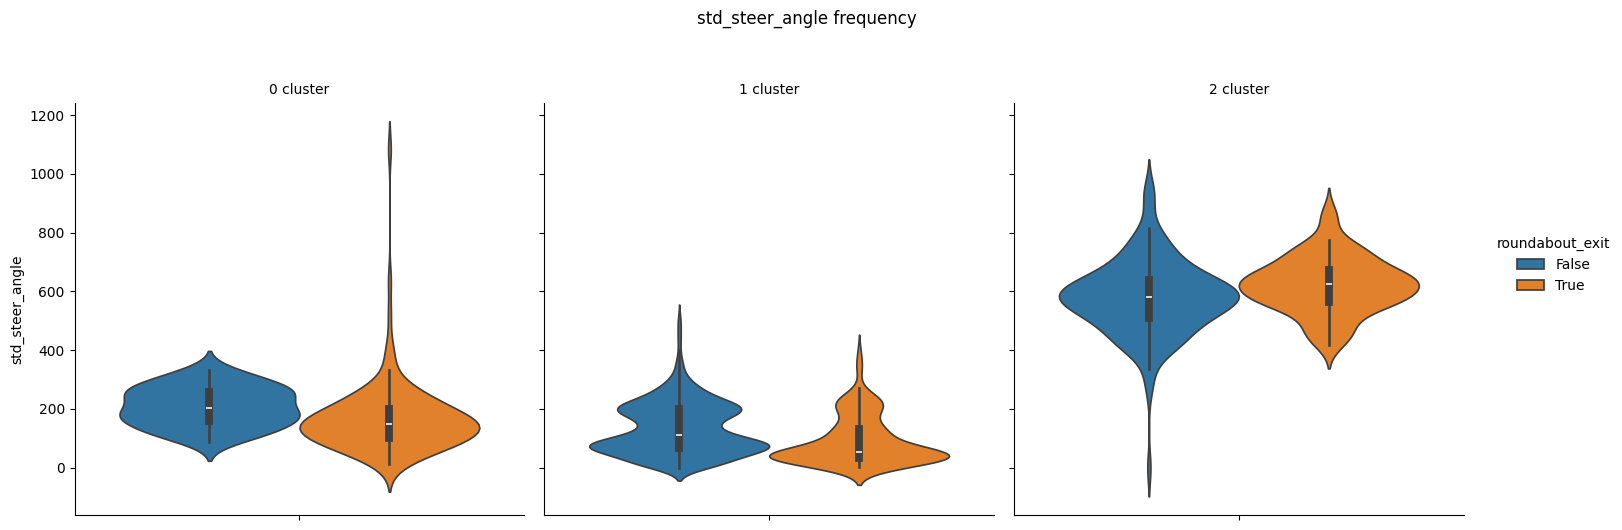

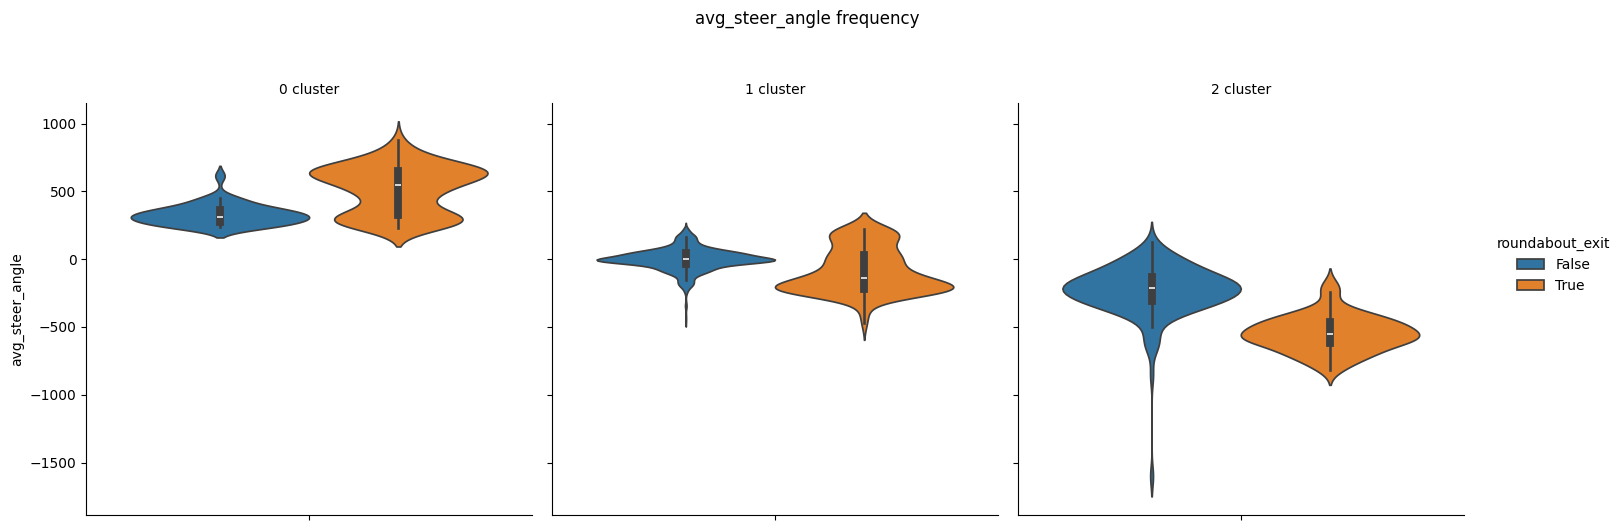

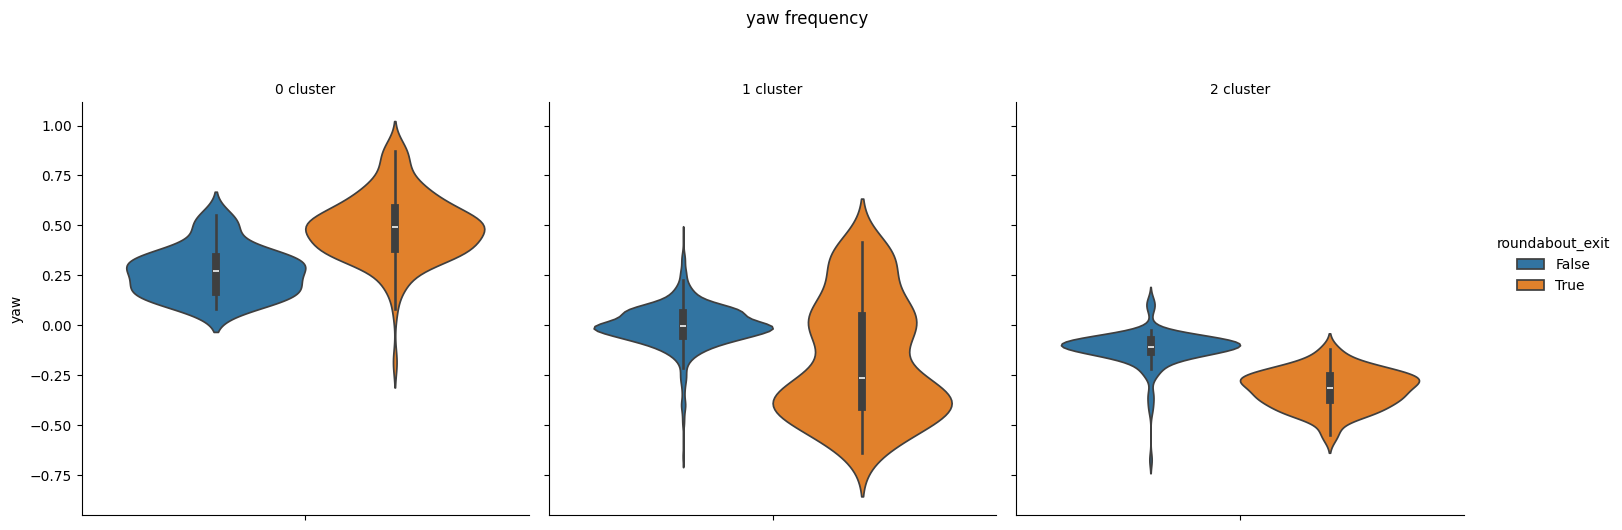

In [173]:
for column in features_interest:
    # Create catplot
    g = sns.catplot(data=X, y=column, hue='roundabout_exit', col='cluster',
                    kind='violin', height=5, aspect=1)

    # Set titles and adjust layout
    g.fig.suptitle(f'{column} frequency', y=1.05)
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.tight_layout()


    plt.show()

## Clustering the track data

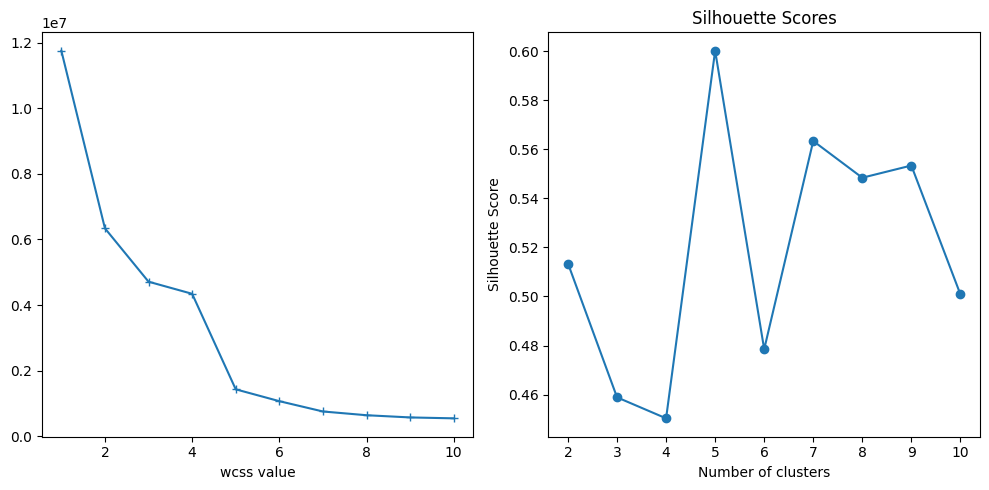

In [40]:
X_track = t_data.drop(['subject','lap','start_time'], axis= 1)
X_track.dropna(axis=0,inplace=True)
data = X_track.drop(['experiment'], axis=1)
# data = X[features_2]
pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_
second_derivative = np.diff(np.cumsum(explained_variance), 2)
elbow_point = np.argmin(second_derivative) + 2
pca_cols = [f'PC{i}' for i in range(1,elbow_point+1)]

pca = PCA(n_components=elbow_point)  # Use 2 for 2D visualization, 3 for 3D
principal_components = pca.fit_transform(data)

# Create a DataFrame with the principal components
df_pca_2 = pd.DataFrame(data=principal_components, columns=pca_cols)
wcss = []
silhouette_scores = []
start = time()
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init ='auto', max_iter=1000, random_state=42)
  kmeans.fit(df_pca_2)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(df_pca_2, kmeans.labels_)

  else:
       score = None
  silhouette_scores.append(score)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,11),wcss, marker='+')
plt.xlabel('No of clusters')
plt.xlabel('wcss value')

# Plotting the silhouette scores on the second subplot
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
components = pca.components_
components_df = pd.DataFrame(components, columns=data.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

top_contributors = {}
for i, pc in enumerate(components_df.index):
    # Getting the absolute values of loadings to consider contribution magnitude
    loadings = components_df.loc[pc].abs()
    # Sorting the features based on their contribution magnitude
    sorted_loadings = loadings.sort_values(ascending=False)
    # Taking the top N features, e.g., top 3 contributors
    top_contributors[pc] = sorted_loadings[:40].index.tolist()

# Displaying the top contributing features for each principal component
set_contributors = set()
for pc in list(top_contributors.keys()):
  print(f"Top contributor for {pc} are: {top_contributors[pc]}\n")
  set_contributors.update(top_contributors[pc])

print (f"\nThere are {len(set_contributors)} unique \n \nContributors are: {set_contributors}")

0.5618504058055803


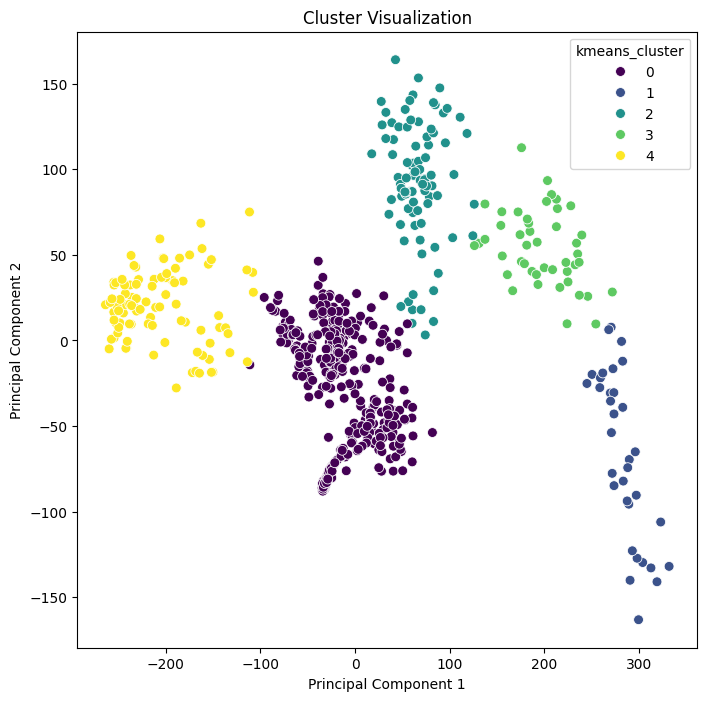

In [41]:
kmeans = KMeans(n_clusters=5, n_init='auto',init='k-means++', max_iter=1000,random_state=42)

df_pca_2['kmeans_cluster'] = kmeans.fit_predict(df_pca_2)
score = silhouette_score(data, kmeans.labels_)
print(score)
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_2, hue='kmeans_cluster', palette='viridis', s=50)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [46]:
components = pca.components_
components_df = pd.DataFrame(components, columns=data.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

top_contributors = {}
for i, pc in enumerate(components_df.index):
    # Getting the absolute values of loadings to consider contribution magnitude
    loadings = components_df.loc[pc].abs()
    # Sorting the features based on their contribution magnitude
    sorted_loadings = loadings.sort_values(ascending=False)
    # Taking the top N features, e.g., top 3 contributors
    top_contributors[pc] = sorted_loadings[:40].index.tolist()

# Displaying the top contributing features for each principal component
set_contributors = set()
for pc in list(top_contributors.keys()):
  print(f"Top contributor for {pc} are: {top_contributors[pc]}\n")
  set_contributors.update(top_contributors[pc])

print (f"\nThere are {len(set_contributors)} unique \n \nContributors are: {set_contributors}")

Top contributor for PC1 are: ['avg_steer_angle', 'std_steer_angle', 'avg_acce_pedal_pos', 'lat_acce', 'EBRmean', 'std_acce_pedal_pos', 'avg_speed', 'yaw', 'std_speed', 'max_speed', 'straight', 'long_acce', 'hrv_lfhf_ratio', 'u_turn', 'habituation', 'car', 'left_turn', 'risk_outcome', 'traffic', 'roundabout_entry', 'yaw_rate', 'zebra_crossing', 'hurry', 'traffic_light', 'hr', 'frustration', 'surprise', 'pedestrian', 'pitch_rate', 'ThetaParietal', 'vert_acce', 'emotion_neutral', 'emotion_fun', 'ThetaFrontal', 'roundabout_exit', 'distraction_no', 'distraction_speaking', 'gsr_phasic', 'gsr_tonic', 'risk_source_driver']

Top contributor for PC2 are: ['std_steer_angle', 'avg_steer_angle', 'avg_acce_pedal_pos', 'std_speed', 'avg_speed', 'std_acce_pedal_pos', 'max_speed', 'lat_acce', 'u_turn', 'hr', 'left_turn', 'zebra_crossing', 'traffic_light', 'straight', 'EBRmean', 'yaw', 'narrow_road', 'risk_outcome', 'habituation', 'long_acce', 'pedestrian', 'surprise', 'distraction_speaking', 'car', 'hu

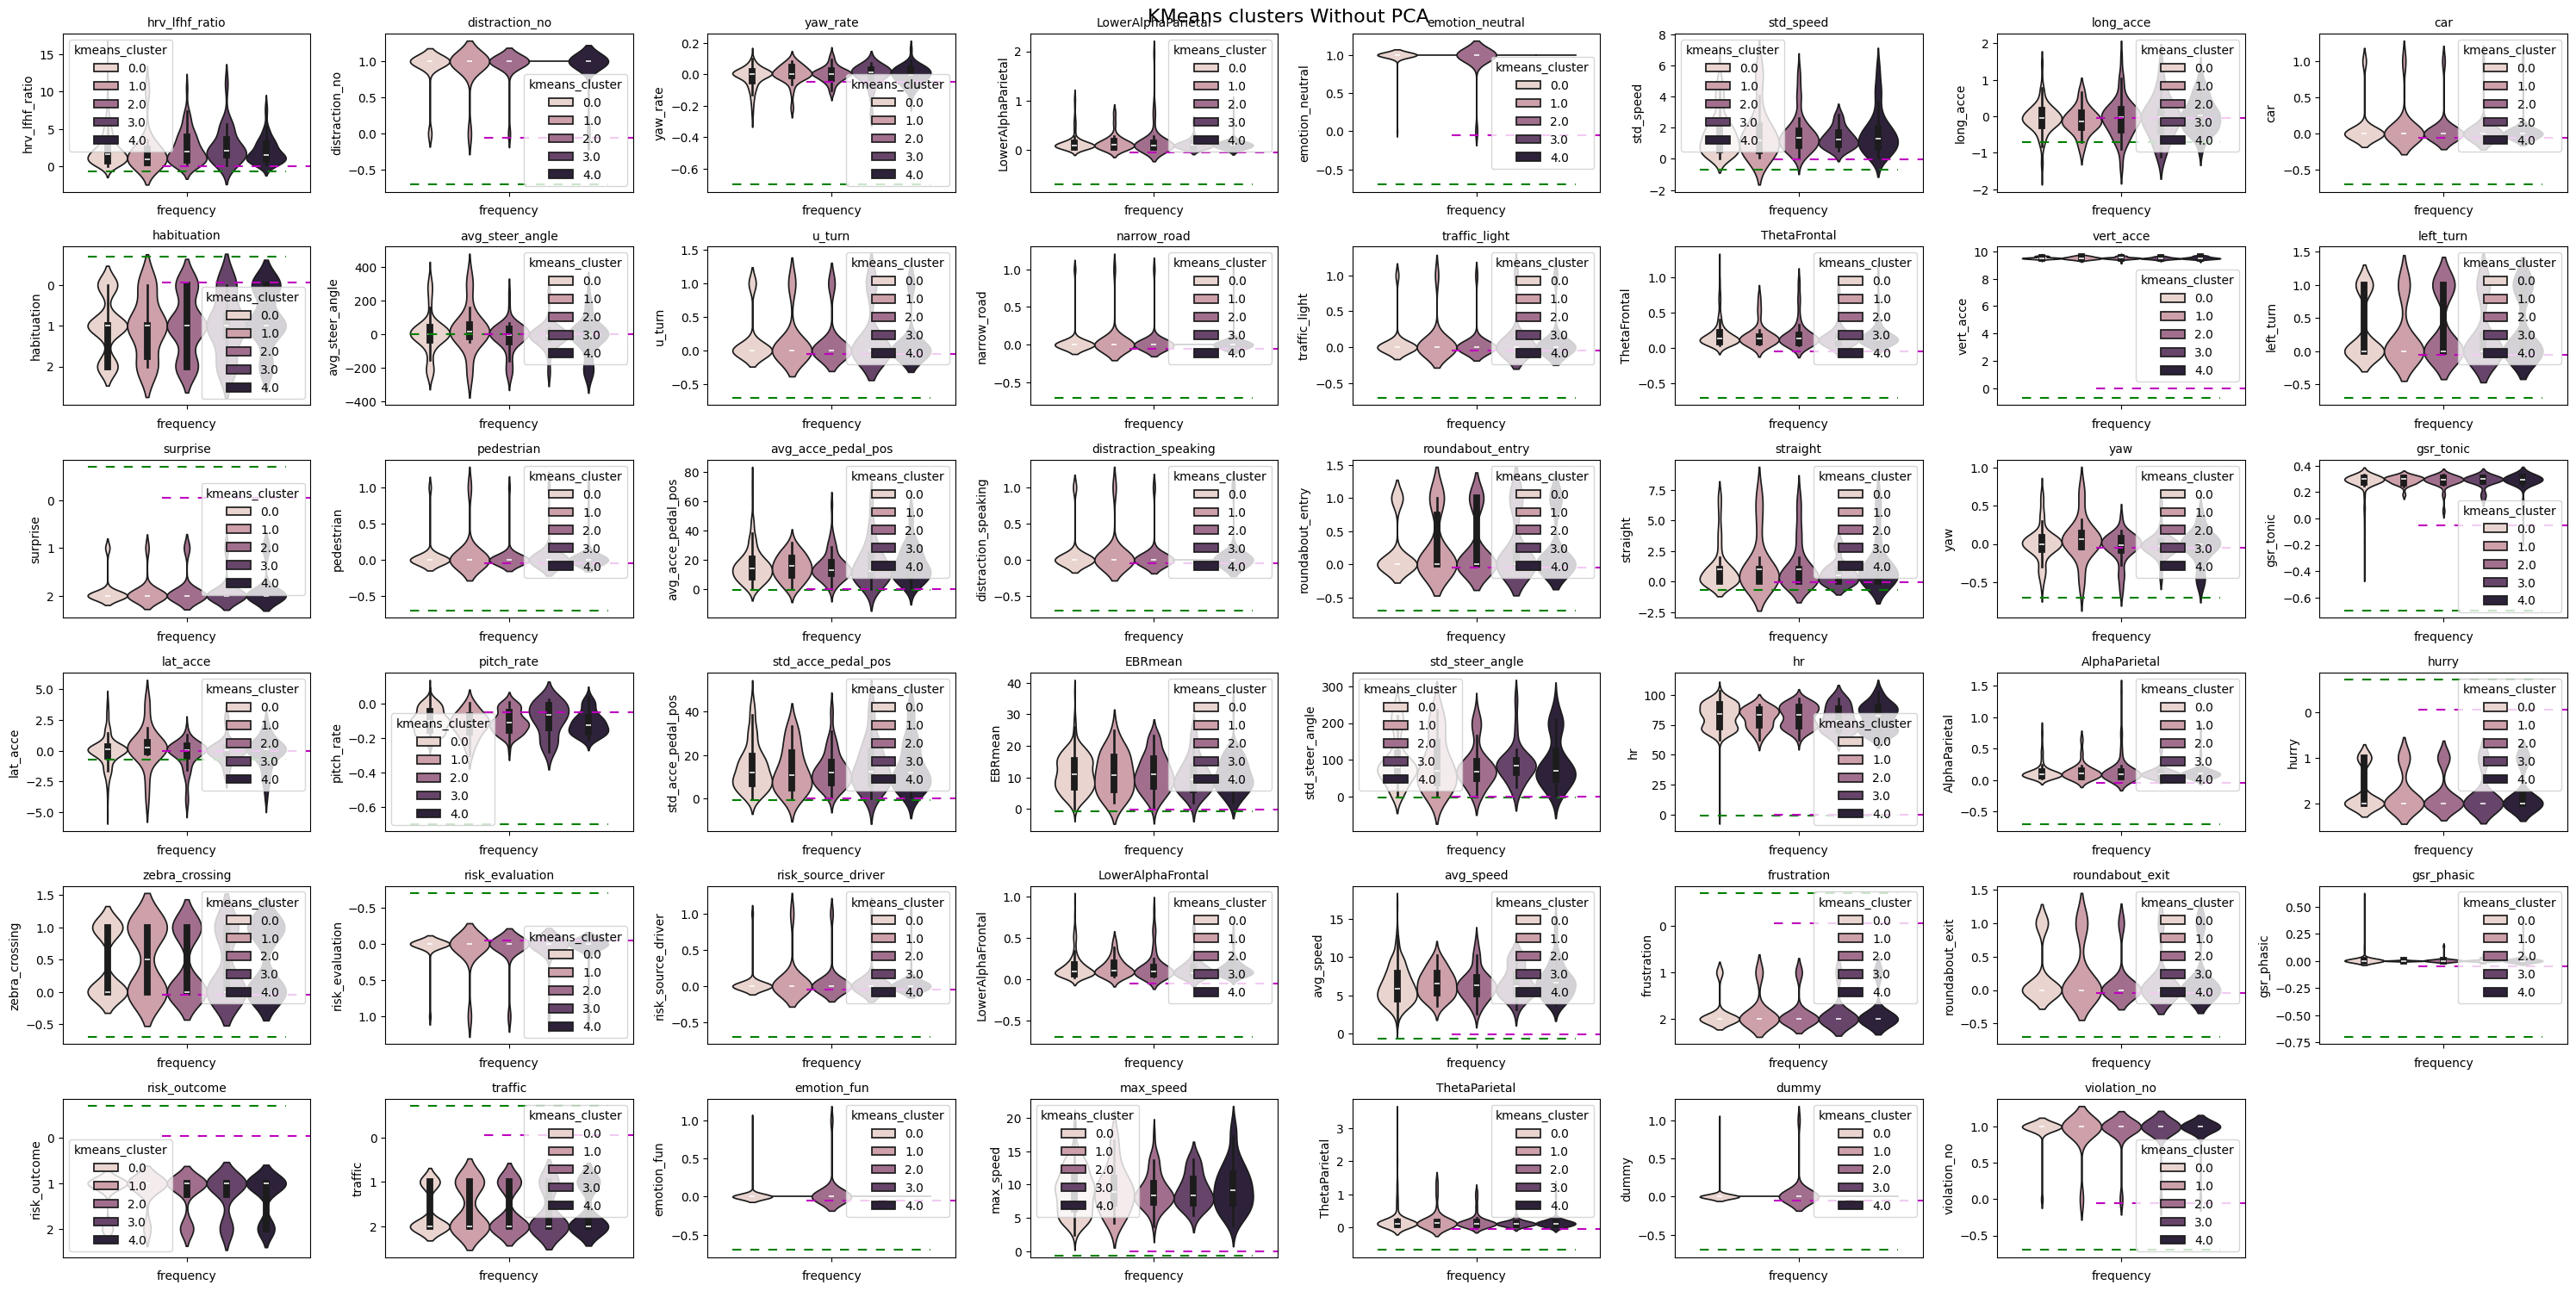

In [48]:
vis_features = list(set_contributors)
n_rows = 8
n_cols = 8
custom_colors = {1: 'orange', 2: 'blue' }
plt.figure(figsize=(30,20))
plt.suptitle('KMeans clusters Without PCA', fontsize=16)
for i,col in enumerate(vis_features,1):
  plt.subplot(n_rows, n_cols, i)
  sns.violinplot(data=data, y=col, hue=df_pca_2['kmeans_cluster'])
  plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
  plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
  plt.title(f"{col}", fontsize = 10)
  plt.xlabel('frequency', size=10)
  plt.ylabel(f'{col}', size=10)
  plt.xticks(rotation=30, fontsize=8)
  plt.tight_layout()

plt.show()

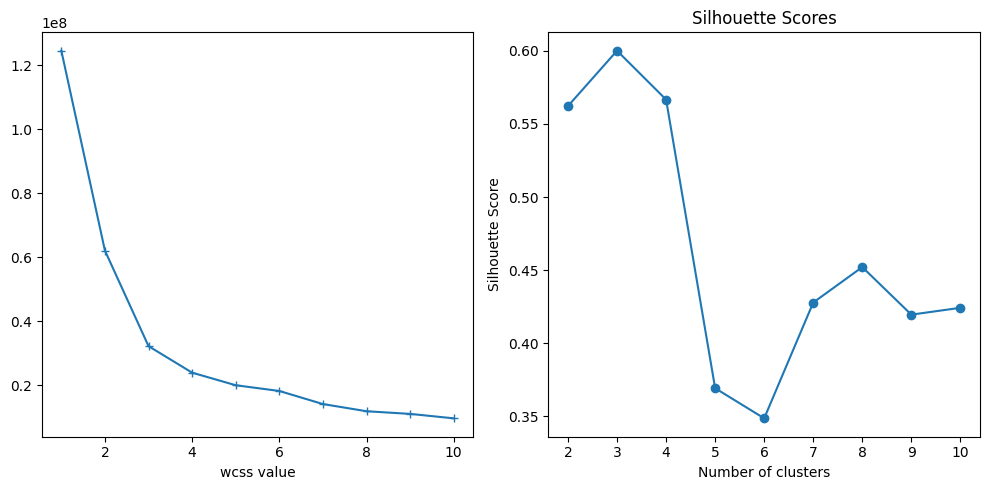

In [37]:
X = sim_data.drop(['subject','lap','start_time'], axis= 1)
X.dropna(axis=0,inplace=True)
data = X.drop(['experiment'], axis=1)
# data = X[features_2]
pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_
second_derivative = np.diff(np.cumsum(explained_variance), 2)
elbow_point = np.argmin(second_derivative) + 2
pca_cols = [f'PC{i}' for i in range(1,elbow_point+1)]

pca = PCA(n_components=elbow_point)  # Use 2 for 2D visualization, 3 for 3D
principal_components = pca.fit_transform(data)

# Create a DataFrame with the principal components
df_pca_2 = pd.DataFrame(data=principal_components, columns=pca_cols)
wcss = []
silhouette_scores = []
start = time()
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init ='auto', max_iter=1000, random_state=42)
  kmeans.fit(df_pca_2)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(df_pca_2, kmeans.labels_)

  else:
       score = None
  silhouette_scores.append(score)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,11),wcss, marker='+')
plt.xlabel('No of clusters')
plt.xlabel('wcss value')

# Plotting the silhouette scores on the second subplot
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

0.5936110792154001


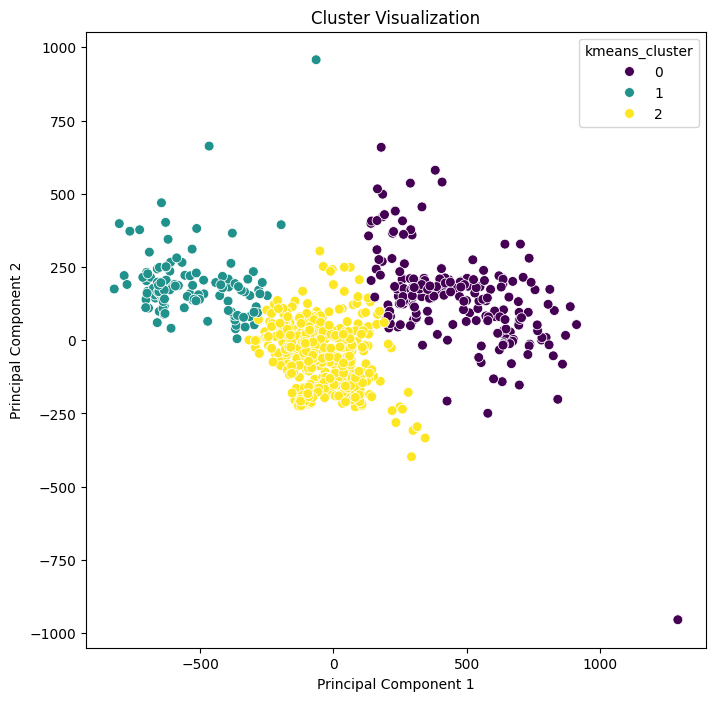

In [38]:
kmeans = KMeans(n_clusters=3, n_init='auto',init='k-means++', max_iter=1000,random_state=42)

df_pca_2['kmeans_cluster'] = kmeans.fit_predict(df_pca_2)
score = silhouette_score(data, kmeans.labels_)
print(score)
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_2, hue='kmeans_cluster', palette='viridis', s=50)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
components = pca.components_
components_df = pd.DataFrame(components, columns=data.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

top_contributors = {}
for i, pc in enumerate(components_df.index):
    # Getting the absolute values of loadings to consider contribution magnitude
    loadings = components_df.loc[pc].abs()
    # Sorting the features based on their contribution magnitude
    sorted_loadings = loadings.sort_values(ascending=False)
    # Taking the top N features, e.g., top 3 contributors
    top_contributors[pc] = sorted_loadings[:30].index.tolist()

# Displaying the top contributing features for each principal component
set_contributors = set()
for pc in list(top_contributors.keys()):
  print(f"Top contributor for {pc} are: {top_contributors[pc]}\n")
  set_contributors.update(top_contributors[pc])

print (f"\nThere are {len(set_contributors)} unique \n \nContributors are: {set_contributors}")

Top contributor for PC1 are: ['avg_steer_angle', 'std_steer_angle', 'std_acce_pedal_pos', 'avg_speed', 'roll_rate', 'lat_acce', 'std_speed', 'long_acce', 'hr', 'max_speed', 'frustration', 'gaze_na', 'gaze_complete_expl', 'distraction_no', 'distraction_speaking', 'vert_acce', 'emotion_neutral', 'yaw_rate', 'emotion_surprise', 'surprise', 'emotion_fear', 'emotion_na', 'risk_outcome', 'emotion_fun', 'gsr_phasic', 'hrv_hf', 'distraction_reduced_attention', 'gsr_tonic', 'distraction_na', 'emotion_anger']

Top contributor for PC2 are: ['std_steer_angle', 'avg_steer_angle', 'hr', 'avg_speed', 'max_speed', 'lat_acce', 'roll_rate', 'std_acce_pedal_pos', 'std_speed', 'long_acce', 'gaze_na', 'gaze_complete_expl', 'frustration', 'surprise', 'distraction_speaking', 'risk_outcome', 'emotion_na', 'emotion_neutral', 'distraction_no', 'vert_acce', 'emotion_fun', 'emotion_fear', 'distraction_na', 'gsr_tonic', 'yaw_rate', 'gaze_poor_expl', 'emotion_surprise', 'gsr_phasic', 'distraction_reduced_attention'

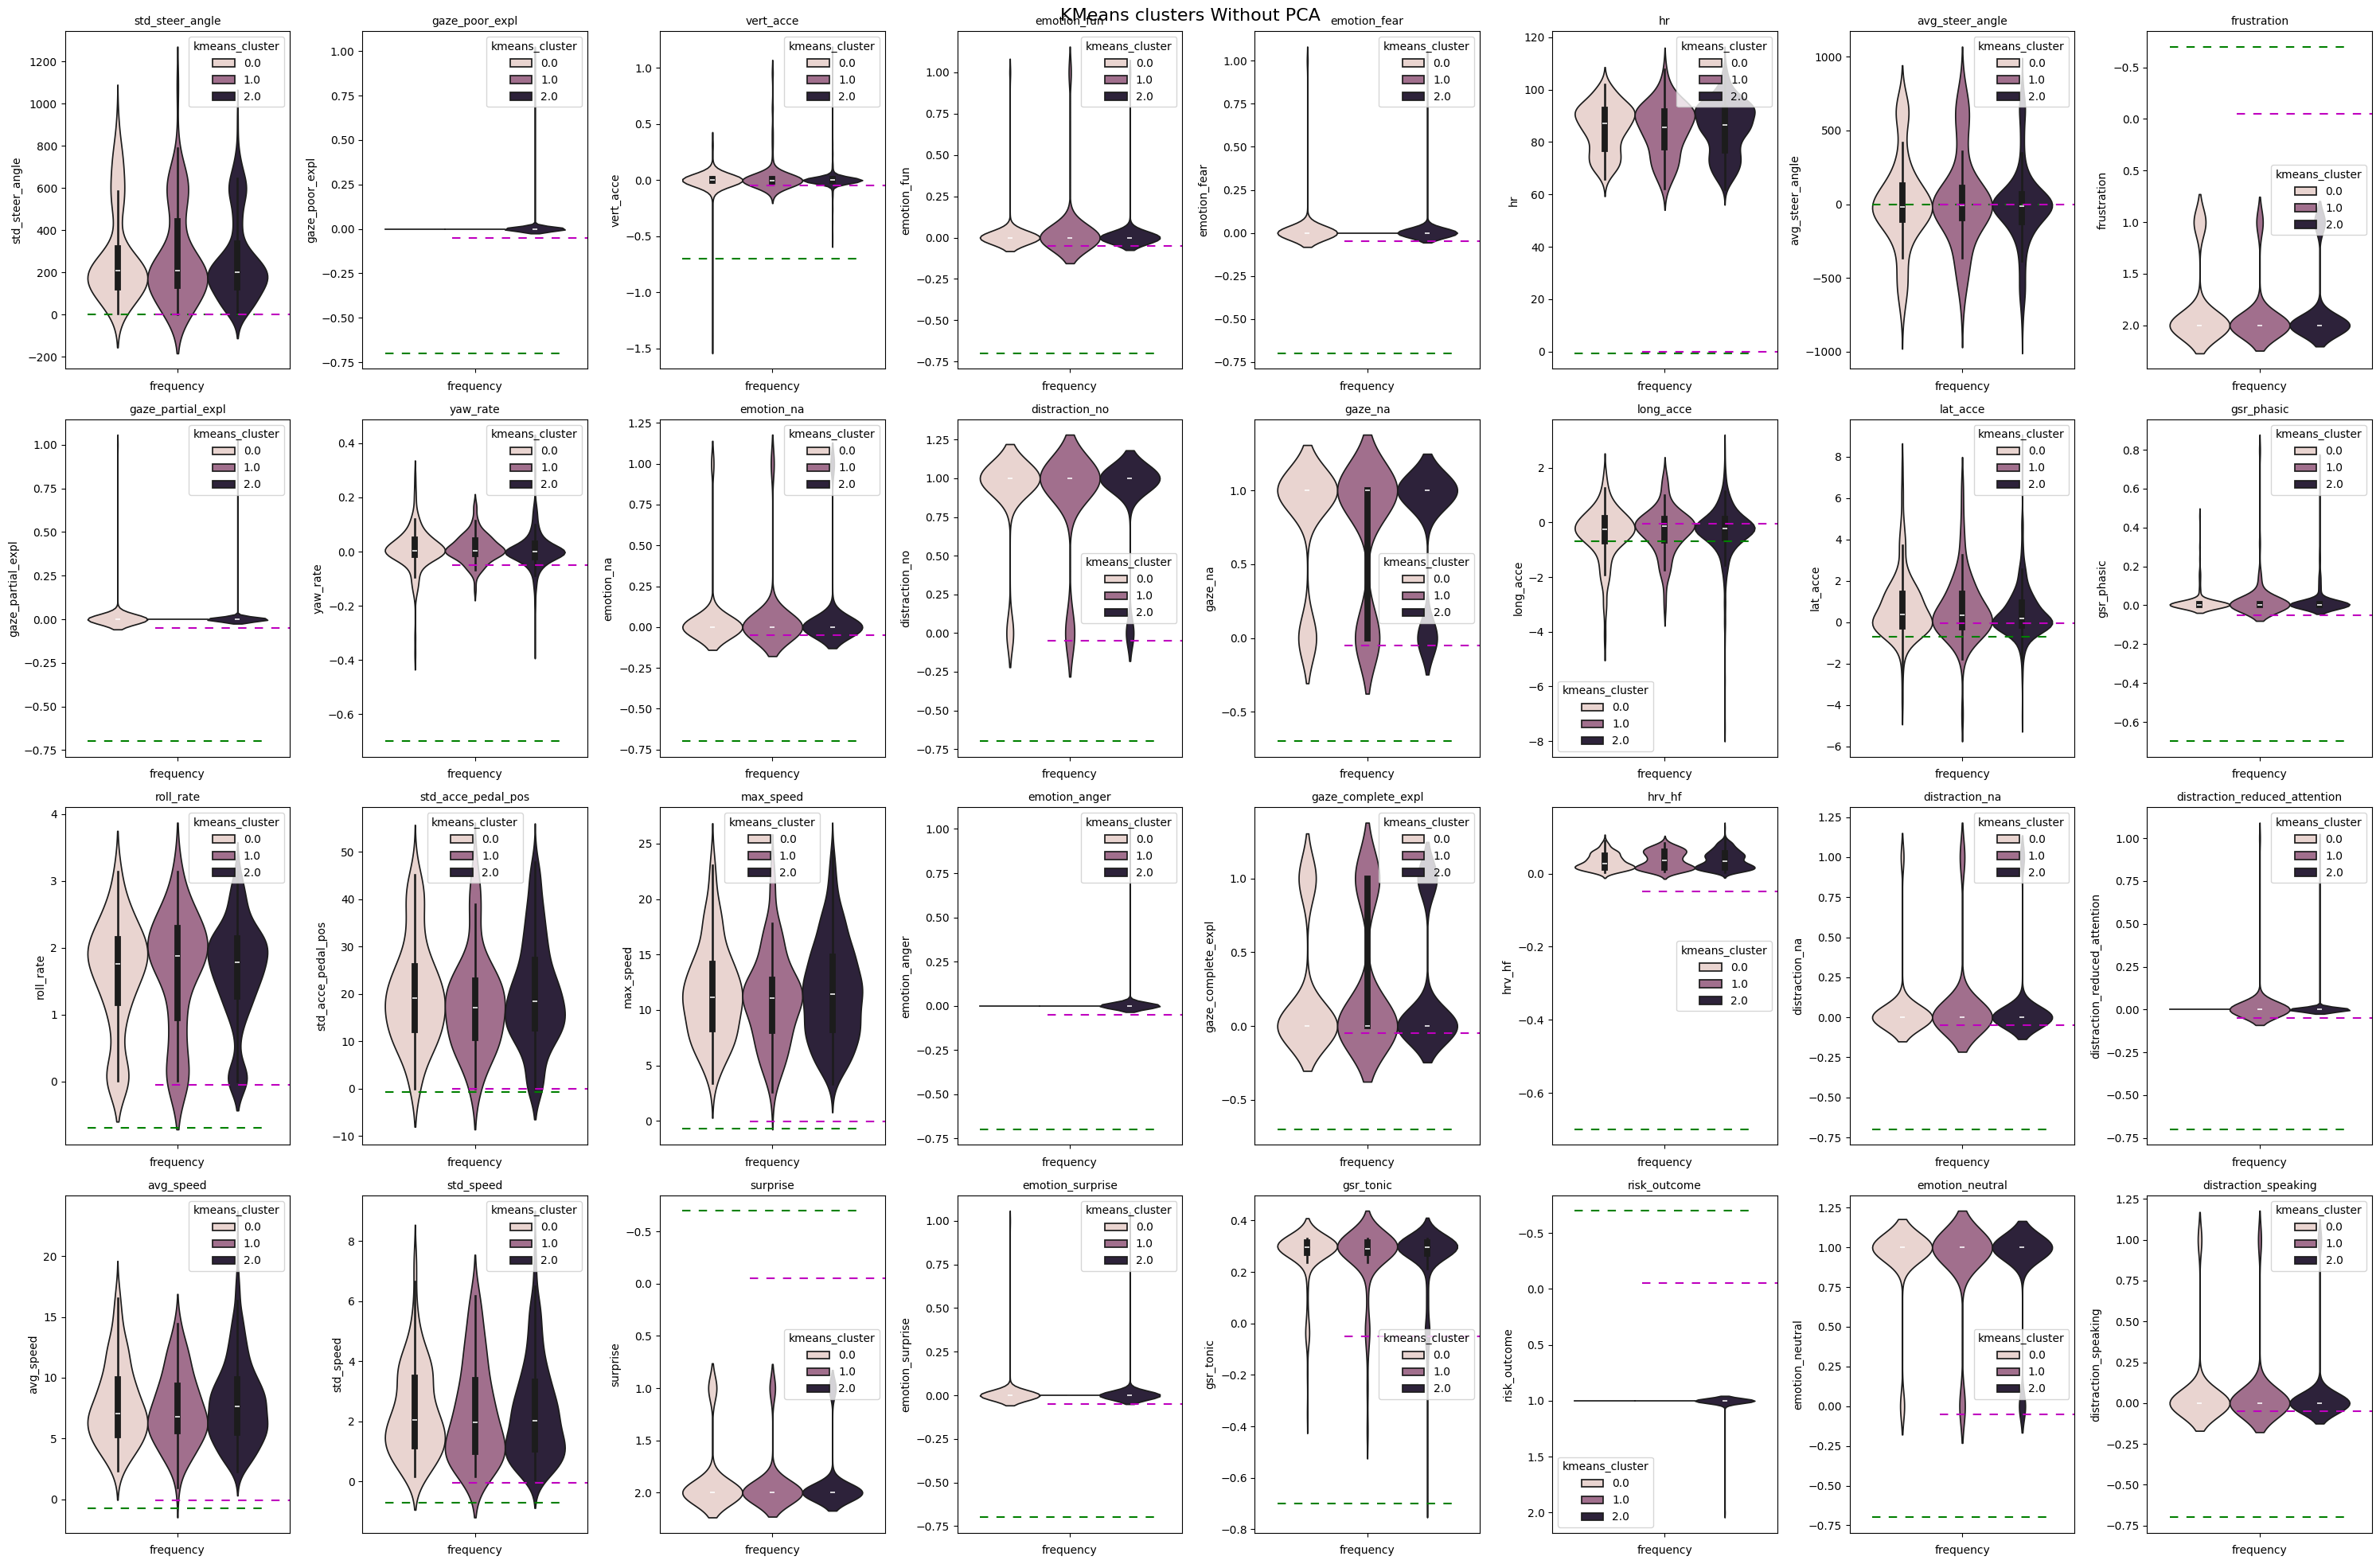

In [ ]:
vis_features = list(set_contributors)
n_rows = 4
n_cols = 8
custom_colors = {1: 'orange', 2: 'blue' }
plt.figure(figsize=(30,20))
plt.suptitle('KMeans clusters Without PCA', fontsize=16)
for i,col in enumerate(vis_features,1):
  plt.subplot(n_rows, n_cols, i)
  sns.violinplot(data=data, y=col, hue=df_pca_2['kmeans_cluster'])
  plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
  plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
  plt.title(f"{col}", fontsize = 10)
  plt.xlabel('frequency', size=10)
  plt.ylabel(f'{col}', size=10)
  plt.xticks(rotation=30, fontsize=8)
  plt.tight_layout()

plt.show()

# Fatigue Features

K-Means

Simulator

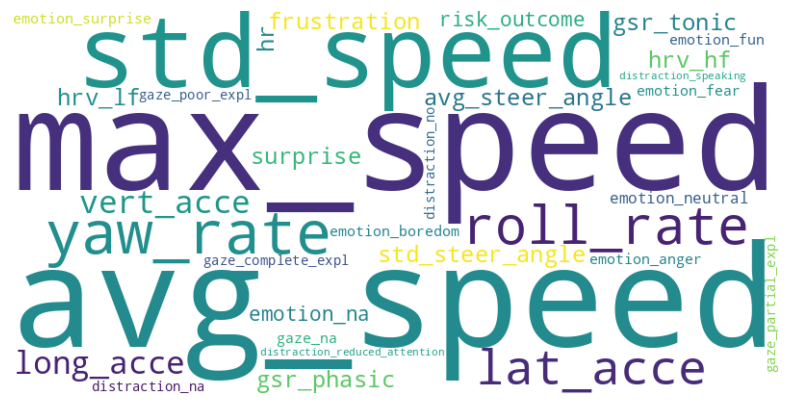

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the list of terms to include in the word cloud
terms = ['max_speed', 'avg_speed', 'std_speed', 'yaw_rate', 'roll_rate',
         'lat_acce', 'long_acce', 'vert_acce', 'avg_steer_angle', 'std_steer_angle',
         'hr', 'hrv_lf', 'hrv_hf', 'gsr_tonic', 'gsr_phasic',
         'frustration', 'surprise', 'risk_outcome', 'emotion_na',
         'emotion_neutral', 'emotion_surprise', 'emotion_anger',
         'emotion_boredom', 'emotion_fear', 'emotion_fun','gaze_na', 'gaze_complete_expl',
         'gaze_partial_expl', 'gaze_poor_expl','distraction_na', 'distraction_no',
         'distraction_reduced_attention',  'distraction_speaking']

# Convert the list of terms into a single string, as required by WordCloud
text = ' '.join(terms)

# Generate the word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
